In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn import set_config
set_config(print_changed_only = False)

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [4]:
df = pd.read_csv('Social Media Data for DSBA.csv')

In [5]:
df.head().T

,0,1,2,3,4
UserID,1000001,1000002,1000003,1000004,1000005
Taken_product,Yes,No,Yes,No,No
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,iOS and Android,iOS,iOS and Android,iOS,iOS and Android
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468


In [6]:
df.tail().T

,11755,11756,11757,11758,11759
UserID,1011756,1011757,1011758,1011759,1011760
Taken_product,No,No,No,No,No
Yearly_avg_view_on_travel_page,279.0,305.0,214.0,382.0,270.0
preferred_device,Laptop,Tab,Tab,Laptop,Tab
total_likes_on_outstation_checkin_given,30987.0,21510.0,5478.0,35851.0,22025.0
yearly_avg_Outstation_checkins,23,6,4,2,8
member_in_family,2,1,3,3,3
preferred_location_type,Historical site,Historical site,Beach,Historical site,Historical site
Yearly_avg_comment_on_travel_page,58.0,55.0,103.0,83.0,104.0
total_likes_on_outofstation_checkin_received,2616,10041,6203,5444,4470


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UserID,11760.0,1.005880e+06,3394.963917,1000001.0,1002940.75,1005880.5,1008820.25,1011760.0
Yearly_avg_view_on_travel_page,11179.0,2.808308e+02,68.182958,35.0,232.00,271.0,324.00,464.0
total_likes_on_outstation_checkin_given,11379.0,2.817048e+04,14385.032134,3570.0,16380.00,28076.0,40525.00,252430.0
Yearly_avg_comment_on_travel_page,11554.0,7.479003e+01,24.026650,3.0,57.00,75.0,92.00,815.0
total_likes_on_outofstation_checkin_received,11760.0,6.531699e+03,4706.613785,1009.0,2940.75,4948.0,8393.25,20065.0
week_since_last_outstation_checkin,11760.0,3.203571e+00,2.616365,0.0,1.00,3.0,5.00,11.0
montly_avg_comment_on_company_page,11760.0,2.866156e+01,48.660504,11.0,17.00,22.0,27.00,500.0
travelling_network_rating,11760.0,2.712245e+00,1.080887,1.0,2.00,3.0,4.00,4.0
Adult_flag,11760.0,7.938776e-01,0.851823,0.0,0.00,1.0,1.00,3.0
Daily_Avg_mins_spend_on_traveling_page,11760.0,1.381743e+01,9.070657,0.0,8.00,12.0,18.00,270.0


In [8]:
df.describe(include = 'O').T

,count,unique,top,freq
Taken_product,11760,2,No,9864
preferred_device,11707,10,Tab,4172
yearly_avg_Outstation_checkins,11685,30,1,4543
member_in_family,11760,7,3,4561
preferred_location_type,11729,15,Beach,2424
following_company_page,11657,4,No,8355
working_flag,11760,2,No,9952


In [9]:
df.rename(columns = {'Taken_product':'taken_product',
                   'Yearly_avg_view_on_travel_page':'yearly_avg_view_on_travel_page',
                   'yearly_avg_Outstation_checkins':'yearly_avg_outstation_checkins',
                   'Yearly_avg_comment_on_travel_page':'yearly_avg_comment_on_travel_page',
                   'Adult_flag':'adult_flag',
                   'Daily_Avg_mins_spend_on_traveling_page':'daily_avg_mins_spend_on_traveling_page'},
         inplace = True)

In [10]:
df.columns

Index(['UserID', 'taken_product', 'yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_outstation_checkins', 'member_in_family',
       'preferred_location_type', 'yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'adult_flag',
       'daily_avg_mins_spend_on_traveling_page'],
      dtype='object')

In [11]:
df.shape

(11760, 17)

In [12]:
df.size

199920

In [13]:
df.dtypes.value_counts()

int64      7
object     7
float64    3
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   taken_product                                 11760 non-null  object 
 2   yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [15]:
df.yearly_avg_outstation_checkins.value_counts(dropna=False)

1      4543
2       844
10      682
9       340
7       336
3       336
8       320
5       261
4       256
16      255
6       236
11      229
24      223
29      215
23      215
18      208
15      206
20      199
26      199
25      198
28      180
19      176
14      167
17      160
12      159
22      152
13      150
21      143
27       96
NaN      75
*         1
Name: yearly_avg_outstation_checkins, dtype: int64

In [16]:
df.yearly_avg_outstation_checkins = df.yearly_avg_outstation_checkins.replace({"*":1,"1":1})

In [17]:
df.yearly_avg_outstation_checkins.value_counts(dropna=False)

1      4544
2       844
10      682
9       340
7       336
3       336
8       320
5       261
4       256
16      255
6       236
11      229
24      223
29      215
23      215
18      208
15      206
26      199
20      199
25      198
28      180
19      176
14      167
17      160
12      159
22      152
13      150
21      143
27       96
NaN      75
Name: yearly_avg_outstation_checkins, dtype: int64

In [18]:
df.member_in_family.value_counts(dropna=False)

3        4561
4        3184
2        2256
1        1349
5         384
Three      15
10         11
Name: member_in_family, dtype: int64

In [19]:
df.member_in_family = df.member_in_family.replace({"Three":3,"3":3})

In [20]:
df.member_in_family.value_counts(dropna=False)

3     4576
4     3184
2     2256
1     1349
5      384
10      11
Name: member_in_family, dtype: int64

In [21]:
df.preferred_location_type.value_counts(dropna=False)

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Trekking            528
Entertainment       516
Hill Stations       108
Tour  Travel         60
Tour and Travel      47
NaN                  31
Game                 12
OTT                   7
Movie                 5
Name: preferred_location_type, dtype: int64

In [22]:
df.preferred_location_type = df.preferred_location_type.str.replace("Tour and Travel","Tour & Travel")
df.preferred_location_type = df.preferred_location_type.str.replace("Tour  Travel" ,"Tour & Travel")

In [23]:
df.preferred_location_type = df.preferred_location_type.str.replace("OTT", "Entertainment")
df.preferred_location_type = df.preferred_location_type.str.replace("Game", "Entertainment")
df.preferred_location_type = df.preferred_location_type.str.replace("Movie", "Entertainment")

In [24]:
df.preferred_location_type.value_counts(dropna=False)

Beach              2424
Financial          2409
Historical site    1856
Medical            1845
Other               643
Big Cities          636
Social media        633
Entertainment       540
Trekking            528
Hill Stations       108
Tour & Travel       107
NaN                  31
Name: preferred_location_type, dtype: int64

In [25]:
df.preferred_device.value_counts(dropna=False)

Tab                4172
iOS and Android    4134
Laptop             1108
iOS                1095
Mobile              600
Android             315
Android OS          145
ANDROID             134
NaN                  53
Other                 2
Others                2
Name: preferred_device, dtype: int64

In [26]:
df.preferred_device = np.where(df.preferred_device == 'Laptop','Laptop','Mobile')

In [27]:
df.preferred_device.value_counts(dropna=False)

Mobile    10652
Laptop     1108
Name: preferred_device, dtype: int64

In [28]:
df.working_flag.value_counts(dropna=False)

No     9952
Yes    1808
Name: working_flag, dtype: int64

In [29]:
df.adult_flag.value_counts(dropna=False)

0    5048
1    4768
2    1264
3     680
Name: adult_flag, dtype: int64

In [30]:
df.adult_flag = np.where(df.adult_flag == 0, 0, 1)

In [31]:
df.adult_flag.value_counts(dropna=False)

1    6712
0    5048
Name: adult_flag, dtype: int64

In [32]:
df.following_company_page.value_counts(dropna=False)

No     8355
Yes    3285
NaN     103
1        12
0         5
Name: following_company_page, dtype: int64

In [33]:
df.following_company_page = df.following_company_page.str.replace('1','Yes').str.replace('0','No')

In [34]:
df.following_company_page.value_counts(dropna=False)

No     8360
Yes    3297
NaN     103
Name: following_company_page, dtype: int64

In [35]:
df.taken_product.value_counts(dropna = False)

No     9864
Yes    1896
Name: taken_product, dtype: int64

In [36]:
df.drop('UserID', axis = 1, inplace = True)

In [37]:
df.isnull().sum()

taken_product                                     0
yearly_avg_view_on_travel_page                  581
preferred_device                                  0
total_likes_on_outstation_checkin_given         381
yearly_avg_outstation_checkins                   75
member_in_family                                  0
preferred_location_type                          31
yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
following_company_page                          103
montly_avg_comment_on_company_page                0
working_flag                                      0
travelling_network_rating                         0
adult_flag                                        0
daily_avg_mins_spend_on_traveling_page            0
dtype: int64

In [38]:
df.isnull().sum().sum()

1377

In [39]:
df.isnull().mean()*100

taken_product                                   0.000000
yearly_avg_view_on_travel_page                  4.940476
preferred_device                                0.000000
total_likes_on_outstation_checkin_given         3.239796
yearly_avg_outstation_checkins                  0.637755
member_in_family                                0.000000
preferred_location_type                         0.263605
yearly_avg_comment_on_travel_page               1.751701
total_likes_on_outofstation_checkin_received    0.000000
week_since_last_outstation_checkin              0.000000
following_company_page                          0.875850
montly_avg_comment_on_company_page              0.000000
working_flag                                    0.000000
travelling_network_rating                       0.000000
adult_flag                                      0.000000
daily_avg_mins_spend_on_traveling_page          0.000000
dtype: float64

In [40]:
df.duplicated().sum()

1175

In [41]:
df.drop_duplicates(inplace = True)

In [42]:
df.duplicated().sum()

0

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
yearly_avg_view_on_travel_page,10121.0,281.731943,68.561292,35.0,232.0,272.0,326.0,464.0
total_likes_on_outstation_checkin_given,10277.0,28178.521650,14426.731210,3570.0,16348.0,28083.0,40537.0,252430.0
yearly_avg_comment_on_travel_page,10379.0,75.854996,24.111673,3.0,58.0,76.0,93.0,815.0
total_likes_on_outofstation_checkin_received,10585.0,6537.477279,4708.849804,1009.0,2943.0,4954.0,8412.0,20065.0
week_since_last_outstation_checkin,10585.0,3.259518,2.623735,0.0,1.0,3.0,5.0,11.0
montly_avg_comment_on_company_page,10585.0,30.160888,51.056307,11.0,19.0,23.0,28.0,500.0
travelling_network_rating,10585.0,2.713651,1.080345,1.0,2.0,3.0,4.0,4.0
adult_flag,10585.0,0.570241,0.495065,0.0,0.0,1.0,1.0,1.0
daily_avg_mins_spend_on_traveling_page,10585.0,14.090978,9.165179,0.0,8.0,12.0,19.0,270.0


In [44]:
df.describe(include = 'O').T

,count,unique,top,freq
taken_product,10585,2,No,8876
preferred_device,10585,2,Mobile,9477
yearly_avg_outstation_checkins,10510,29,1,3791
member_in_family,10585,6,3,4111
preferred_location_type,10554,11,Beach,2424
following_company_page,10482,2,No,7512
working_flag,10585,2,No,8952


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10585 entries, 0 to 11759
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   taken_product                                 10585 non-null  object 
 1   yearly_avg_view_on_travel_page                10121 non-null  float64
 2   preferred_device                              10585 non-null  object 
 3   total_likes_on_outstation_checkin_given       10277 non-null  float64
 4   yearly_avg_outstation_checkins                10510 non-null  object 
 5   member_in_family                              10585 non-null  object 
 6   preferred_location_type                       10554 non-null  object 
 7   yearly_avg_comment_on_travel_page             10379 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10585 non-null  int64  
 9   week_since_last_outstation_checkin            10585 non-null 

In [46]:
df.yearly_avg_outstation_checkins = df.yearly_avg_outstation_checkins.astype('float64')
df.member_in_family = df.member_in_family.astype('float64')

In [47]:
df_num = df.select_dtypes(['float64','int64', 'int32'])
df_cat = df.select_dtypes('object')

In [48]:
df_num.isnull().sum()

yearly_avg_view_on_travel_page                  464
total_likes_on_outstation_checkin_given         308
yearly_avg_outstation_checkins                   75
member_in_family                                  0
yearly_avg_comment_on_travel_page               206
total_likes_on_outofstation_checkin_received      0
week_since_last_outstation_checkin                0
montly_avg_comment_on_company_page                0
travelling_network_rating                         0
adult_flag                                        0
daily_avg_mins_spend_on_traveling_page            0
dtype: int64

In [49]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_num=pd.DataFrame(imputer.fit_transform(df_num),columns=df_num.columns)

In [50]:
df_num.isnull().sum()

yearly_avg_view_on_travel_page                  0
total_likes_on_outstation_checkin_given         0
yearly_avg_outstation_checkins                  0
member_in_family                                0
yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
montly_avg_comment_on_company_page              0
travelling_network_rating                       0
adult_flag                                      0
daily_avg_mins_spend_on_traveling_page          0
dtype: int64

In [51]:
df_cat.isnull().sum()

taken_product                0
preferred_device             0
preferred_location_type     31
following_company_page     103
working_flag                 0
dtype: int64

In [52]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'most_frequent')
df_cat=pd.DataFrame(imputer.fit_transform(df_cat),columns=df_cat.columns)

In [53]:
df_cat.isnull().sum()

taken_product              0
preferred_device           0
preferred_location_type    0
following_company_page     0
working_flag               0
dtype: int64

In [54]:
df1 = pd.concat([df_num, df_cat], axis = 1, join = 'inner')

In [55]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10585 entries, 0 to 10584
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   yearly_avg_view_on_travel_page                10585 non-null  float64
 1   total_likes_on_outstation_checkin_given       10585 non-null  float64
 2   yearly_avg_outstation_checkins                10585 non-null  float64
 3   member_in_family                              10585 non-null  float64
 4   yearly_avg_comment_on_travel_page             10585 non-null  float64
 5   total_likes_on_outofstation_checkin_received  10585 non-null  float64
 6   week_since_last_outstation_checkin            10585 non-null  float64
 7   montly_avg_comment_on_company_page            10585 non-null  float64
 8   travelling_network_rating                     10585 non-null  float64
 9   adult_flag                                    10585 non-null 

In [56]:
df1.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,adult_flag,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_device,preferred_location_type,following_company_page,working_flag
0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,0.0,8.0,Yes,Mobile,Financial,Yes,No
1,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,1.0,10.0,No,Mobile,Financial,No,Yes
2,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,0.0,7.0,Yes,Mobile,Other,Yes,No
3,247.0,48720.0,1.0,4.0,56.0,2909.0,1.0,11.0,3.0,0.0,8.0,No,Mobile,Financial,Yes,No
4,202.0,20685.0,1.0,1.0,40.0,3468.0,9.0,12.0,4.0,1.0,6.0,No,Mobile,Medical,No,No


In [57]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
yearly_avg_view_on_travel_page,10585.0,281.305338,67.071197,35.0,233.0,272.0,322.0,464.0
total_likes_on_outstation_checkin_given,10585.0,28175.742182,14215.277746,3570.0,16559.0,28083.0,40149.0,252430.0
yearly_avg_outstation_checkins,10585.0,8.316013,8.596425,1.0,1.0,5.0,14.0,29.0
member_in_family,10585.0,2.922815,1.047346,1.0,2.0,3.0,4.0,10.0
yearly_avg_comment_on_travel_page,10585.0,75.857818,23.875882,3.0,58.0,76.0,93.0,815.0
total_likes_on_outofstation_checkin_received,10585.0,6537.477279,4708.849804,1009.0,2943.0,4954.0,8412.0,20065.0
week_since_last_outstation_checkin,10585.0,3.259518,2.623735,0.0,1.0,3.0,5.0,11.0
montly_avg_comment_on_company_page,10585.0,30.160888,51.056307,11.0,19.0,23.0,28.0,500.0
travelling_network_rating,10585.0,2.713651,1.080345,1.0,2.0,3.0,4.0,4.0
adult_flag,10585.0,0.570241,0.495065,0.0,0.0,1.0,1.0,1.0


In [58]:
df1.describe(include = 'O')

,taken_product,preferred_device,preferred_location_type,following_company_page,working_flag
count,10585,10585,10585,10585,10585
unique,2,2,11,2,2
top,No,Mobile,Beach,No,No
freq,8876,9477,2455,7615,8952


In [59]:
df1_num = df1.select_dtypes('float64')
df1_cat = df1.select_dtypes('object')

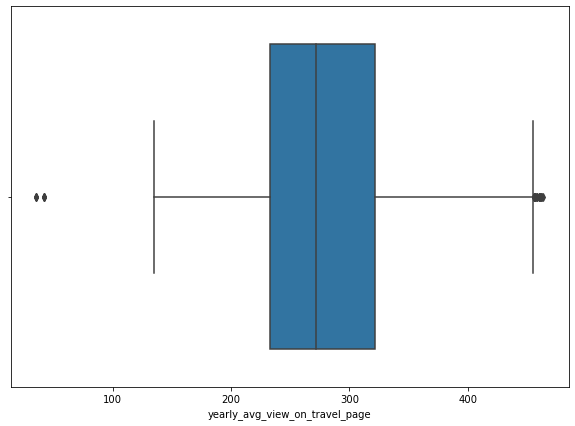

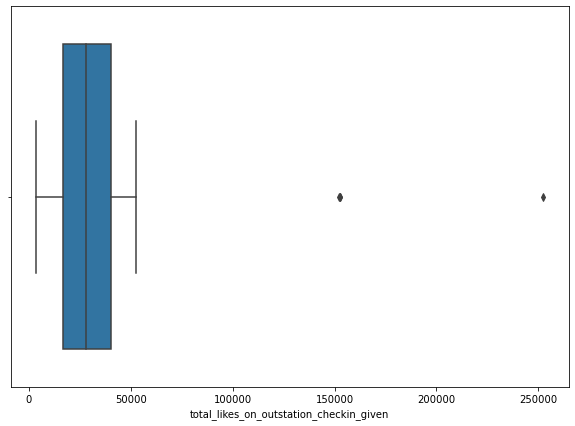

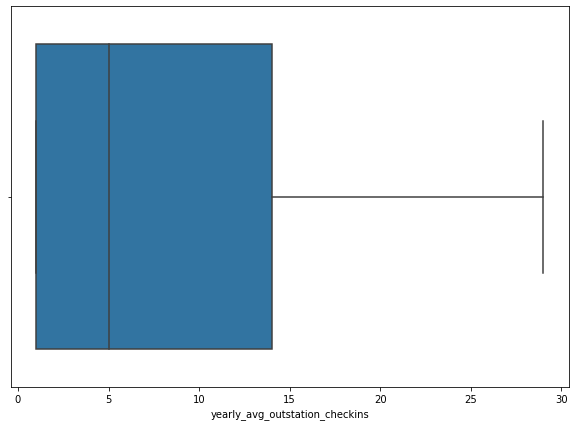

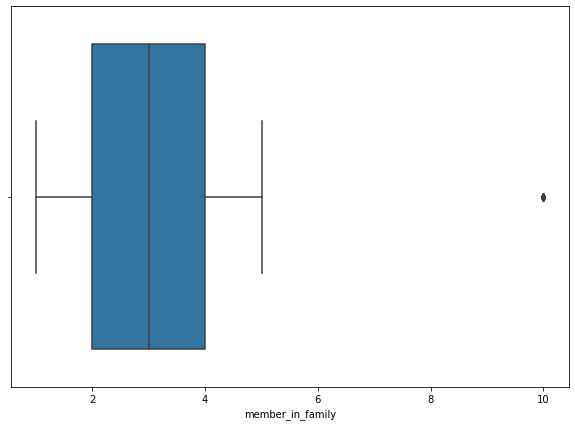

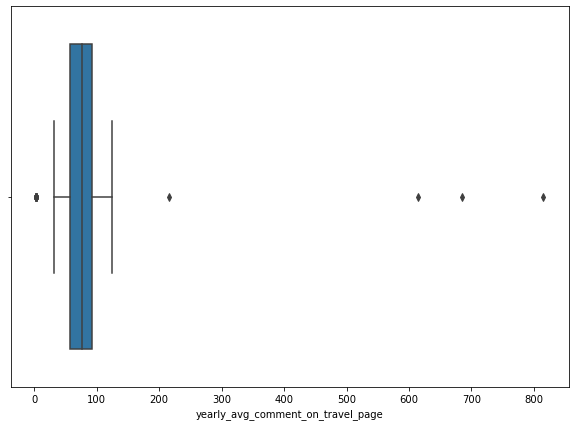

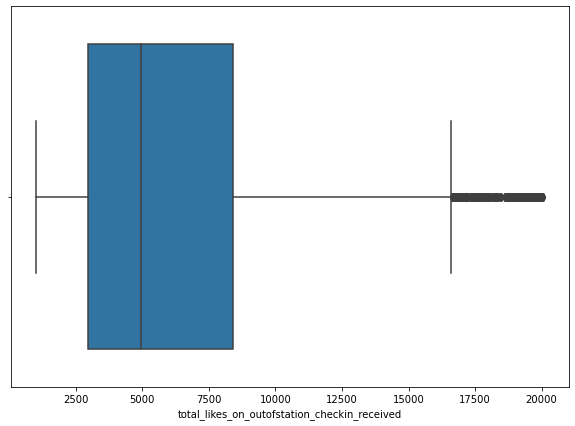

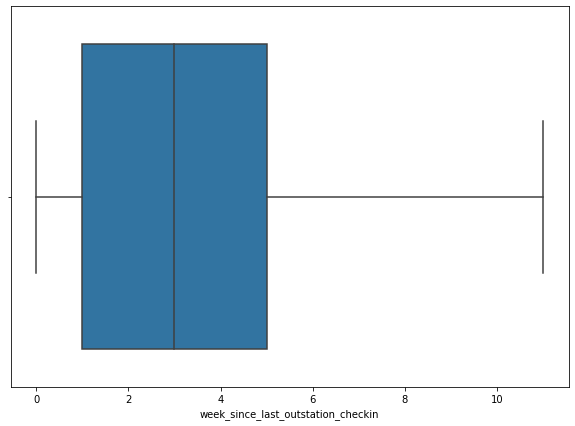

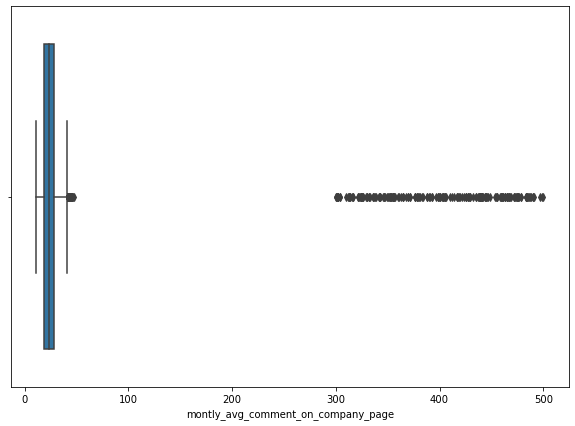

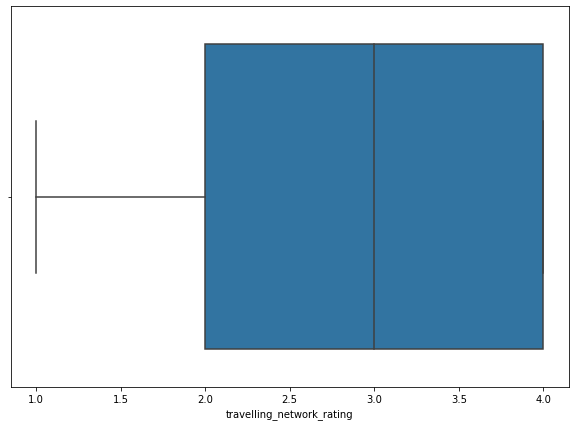

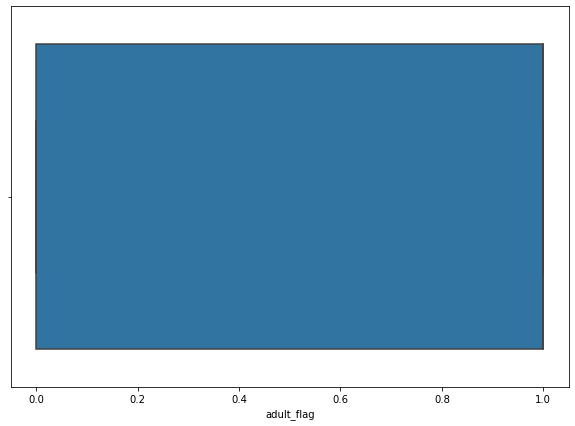

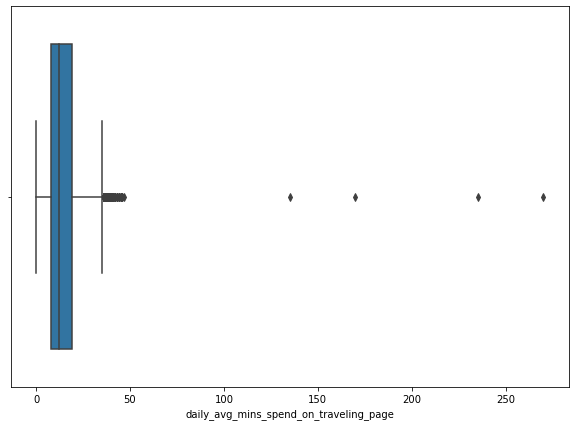

In [60]:
for i in df1_num.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df1, x = df1_num[i])
    plt.show()

In [61]:
q1 = df1.quantile(0.25)
q3 = df1.quantile(0.75)

In [62]:
((df1 > q3) | (df1 < q1)).sum()

adult_flag                                         0
daily_avg_mins_spend_on_traveling_page          4669
following_company_page                             0
member_in_family                                1568
montly_avg_comment_on_company_page              5128
preferred_device                                   0
preferred_location_type                            0
taken_product                                      0
total_likes_on_outofstation_checkin_received    5291
total_likes_on_outstation_checkin_given         5292
travelling_network_rating                       1981
week_since_last_outstation_checkin              3025
working_flag                                       0
yearly_avg_comment_on_travel_page               5079
yearly_avg_outstation_checkins                  2540
yearly_avg_view_on_travel_page                  5237
dtype: int64

In [63]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [64]:
for column in df1_num.columns:
    lr,ur=remove_outlier(df1_num[column])
    df1_num[column]=np.where(df1_num[column]>ur,ur,df1_num[column])
    df1_num[column]=np.where(df1_num[column]<lr,lr,df1_num[column])

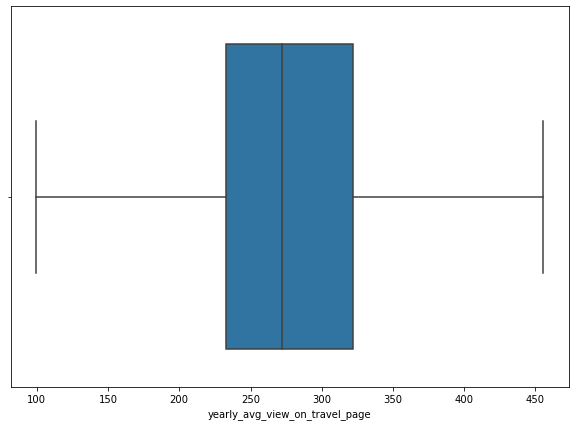

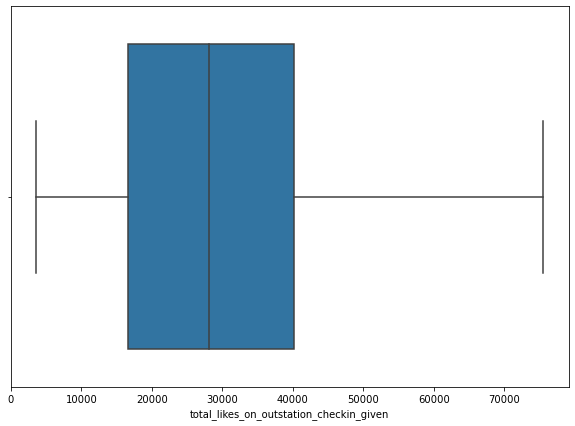

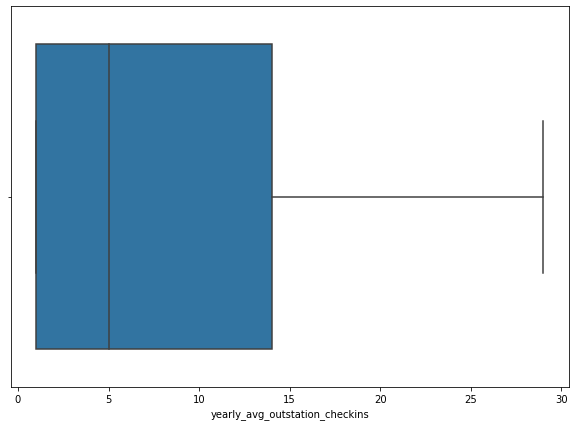

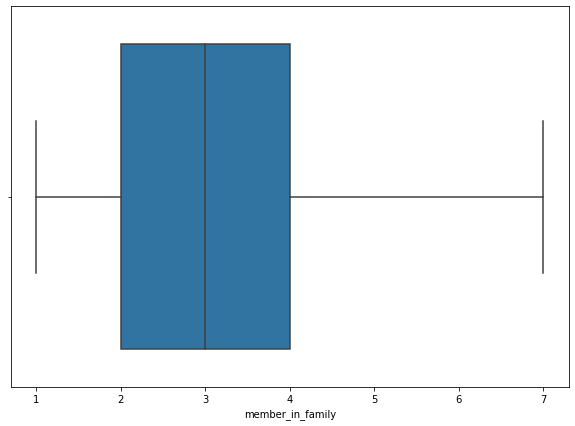

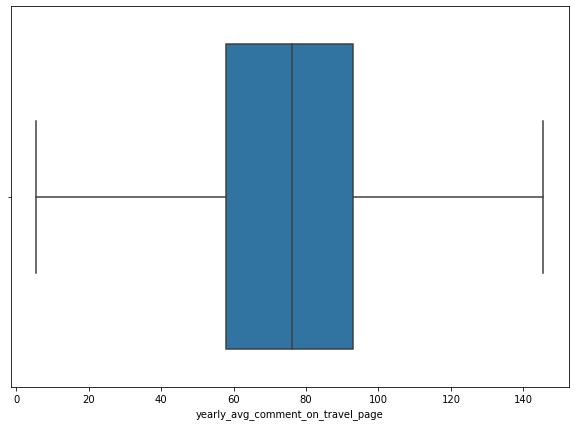

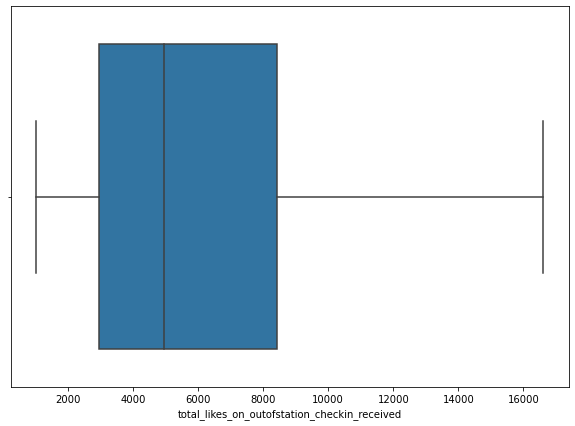

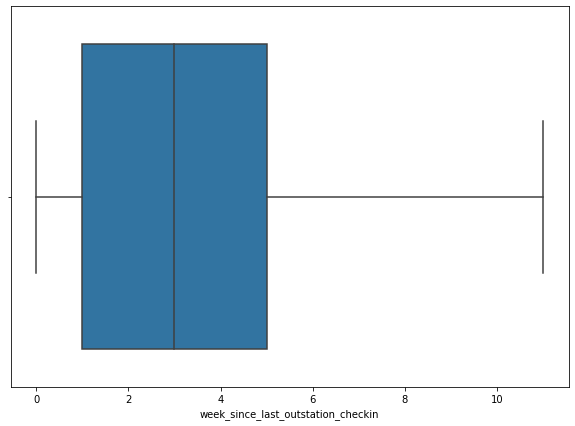

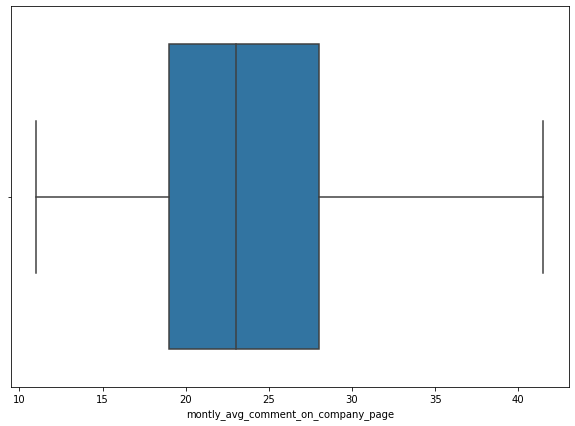

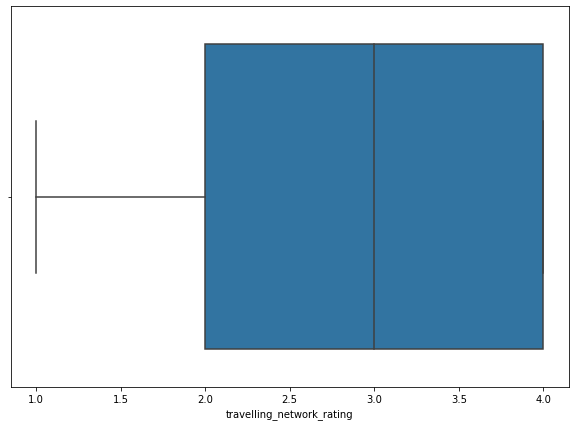

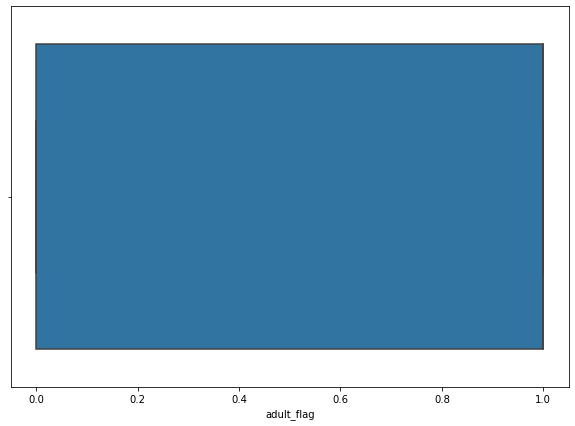

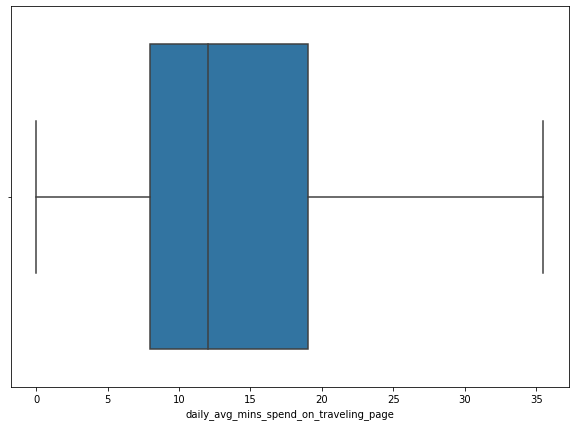

In [65]:
for i in df1_num.columns:
    plt.figure(figsize=(10,7))
    sns.boxplot(data = df1, x = df1_num[i])
    plt.show()

In [66]:
from scipy.stats import shapiro
for i in df1_num:
    print(shapiro(df1[i]))

ShapiroResult(statistic=0.9784329533576965, pvalue=4.367935202740137e-37)
ShapiroResult(statistic=0.9409269094467163, pvalue=0.0)
ShapiroResult(statistic=0.8128003478050232, pvalue=0.0)
ShapiroResult(statistic=0.8884152770042419, pvalue=0.0)
ShapiroResult(statistic=0.8326599597930908, pvalue=0.0)
ShapiroResult(statistic=0.8283295631408691, pvalue=0.0)
ShapiroResult(statistic=0.8944705724716187, pvalue=0.0)
ShapiroResult(statistic=0.20721435546875, pvalue=0.0)
ShapiroResult(statistic=0.8536201119422913, pvalue=0.0)
ShapiroResult(statistic=0.6293131113052368, pvalue=0.0)
ShapiroResult(statistic=0.8270550966262817, pvalue=0.0)


In [67]:
df1.skew()

yearly_avg_view_on_travel_page                  0.426971
total_likes_on_outstation_checkin_given         0.547059
yearly_avg_outstation_checkins                  0.970549
member_in_family                                0.031438
yearly_avg_comment_on_travel_page               5.409056
total_likes_on_outofstation_checkin_received    1.366910
week_since_last_outstation_checkin              0.906320
montly_avg_comment_on_company_page              7.305379
travelling_network_rating                      -0.304024
adult_flag                                     -0.283818
daily_avg_mins_spend_on_traveling_page          4.728651
dtype: float64

In [68]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_num[column].describe(),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1_num[column], kde=True, color='r');
    plt.show()
    
    plt.figure()
    print("Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.boxplot(df1_num[column]);
    plt.show()

Description of yearly_avg_view_on_travel_page
----------------------------------------------------------------------------
count    10585.000000
mean       281.350260
std         66.890428
min         99.500000
25%        233.000000
50%        272.000000
75%        322.000000
max        455.500000
Name: yearly_avg_view_on_travel_page, dtype: float64 


Distribution of yearly_avg_view_on_travel_page
----------------------------------------------------------------------------


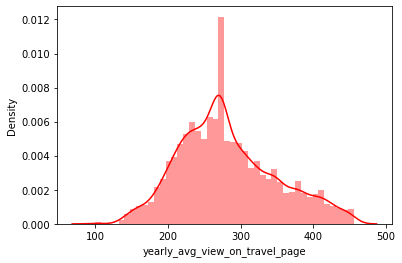

Boxplot of yearly_avg_view_on_travel_page
----------------------------------------------------------------------------


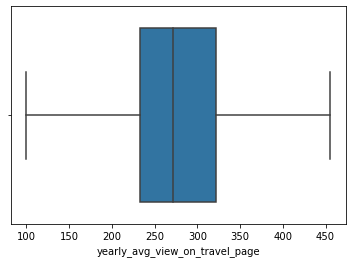

Description of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------
count    10585.000000
mean     28137.229759
std      13920.881365
min       3570.000000
25%      16559.000000
50%      28083.000000
75%      40149.000000
max      75534.000000
Name: total_likes_on_outstation_checkin_given, dtype: float64 


Distribution of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------


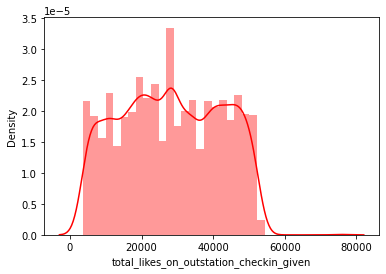

Boxplot of total_likes_on_outstation_checkin_given
----------------------------------------------------------------------------


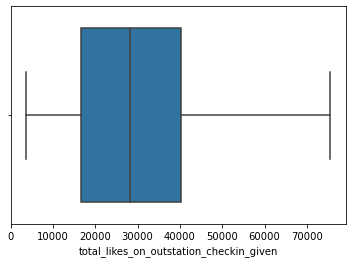

Description of yearly_avg_outstation_checkins
----------------------------------------------------------------------------
count    10585.000000
mean         8.316013
std          8.596425
min          1.000000
25%          1.000000
50%          5.000000
75%         14.000000
max         29.000000
Name: yearly_avg_outstation_checkins, dtype: float64 


Distribution of yearly_avg_outstation_checkins
----------------------------------------------------------------------------


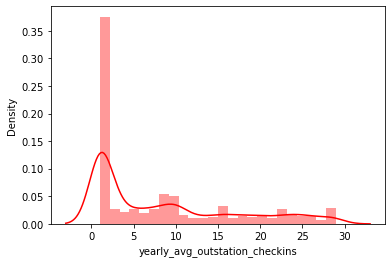

Boxplot of yearly_avg_outstation_checkins
----------------------------------------------------------------------------


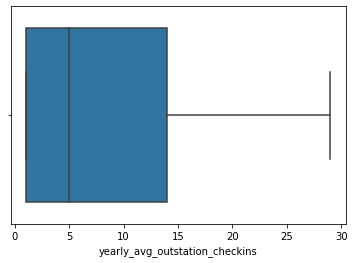

Description of member_in_family
----------------------------------------------------------------------------
count    10585.000000
mean         2.919698
std          1.030604
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: member_in_family, dtype: float64 


Distribution of member_in_family
----------------------------------------------------------------------------


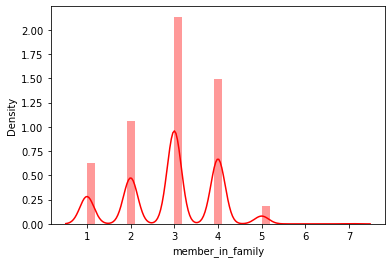

Boxplot of member_in_family
----------------------------------------------------------------------------


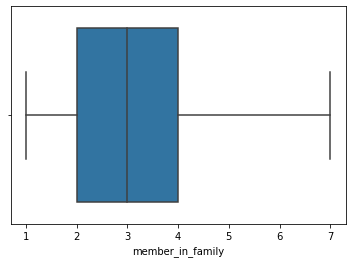

Description of yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------
count    10585.000000
mean        75.697638
std         21.335071
min          5.500000
25%         58.000000
50%         76.000000
75%         93.000000
max        145.500000
Name: yearly_avg_comment_on_travel_page, dtype: float64 


Distribution of yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------


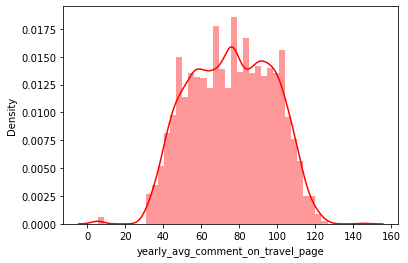

Boxplot of yearly_avg_comment_on_travel_page
----------------------------------------------------------------------------


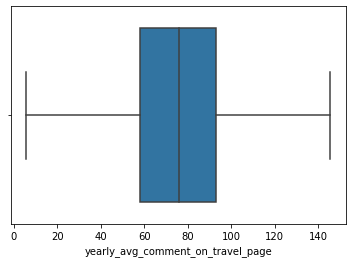

Description of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------
count    10585.000000
mean      6396.526641
std       4354.786062
min       1009.000000
25%       2943.000000
50%       4954.000000
75%       8412.000000
max      16615.500000
Name: total_likes_on_outofstation_checkin_received, dtype: float64 


Distribution of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------


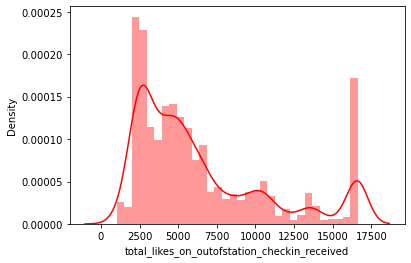

Boxplot of total_likes_on_outofstation_checkin_received
----------------------------------------------------------------------------


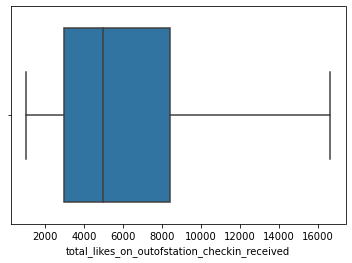

Description of week_since_last_outstation_checkin
----------------------------------------------------------------------------
count    10585.000000
mean         3.259518
std          2.623735
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         11.000000
Name: week_since_last_outstation_checkin, dtype: float64 


Distribution of week_since_last_outstation_checkin
----------------------------------------------------------------------------


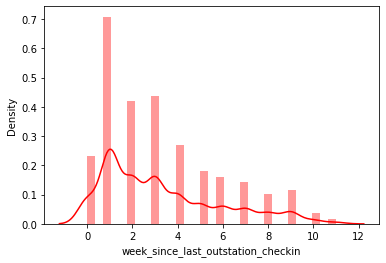

Boxplot of week_since_last_outstation_checkin
----------------------------------------------------------------------------


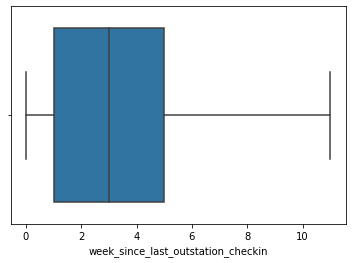

Description of montly_avg_comment_on_company_page
----------------------------------------------------------------------------
count    10585.000000
mean        23.696410
std          7.131252
min         11.000000
25%         19.000000
50%         23.000000
75%         28.000000
max         41.500000
Name: montly_avg_comment_on_company_page, dtype: float64 


Distribution of montly_avg_comment_on_company_page
----------------------------------------------------------------------------


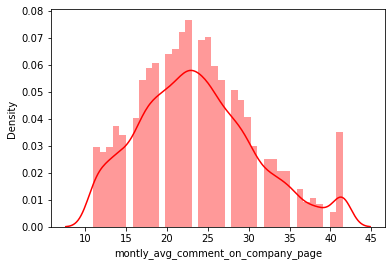

Boxplot of montly_avg_comment_on_company_page
----------------------------------------------------------------------------


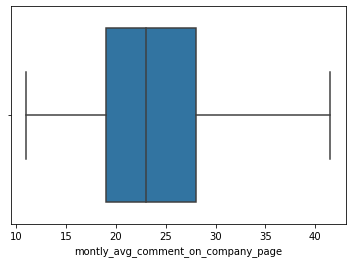

Description of travelling_network_rating
----------------------------------------------------------------------------
count    10585.000000
mean         2.713651
std          1.080345
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          4.000000
Name: travelling_network_rating, dtype: float64 


Distribution of travelling_network_rating
----------------------------------------------------------------------------


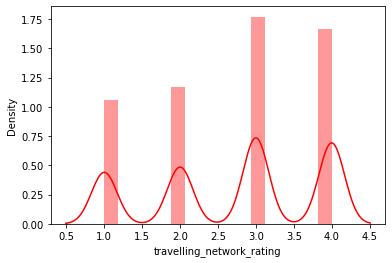

Boxplot of travelling_network_rating
----------------------------------------------------------------------------


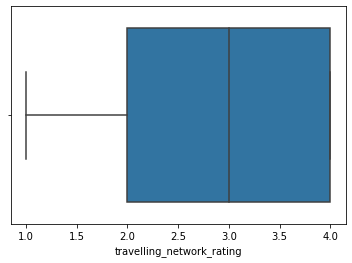

Description of adult_flag
----------------------------------------------------------------------------
count    10585.000000
mean         0.570241
std          0.495065
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: adult_flag, dtype: float64 


Distribution of adult_flag
----------------------------------------------------------------------------


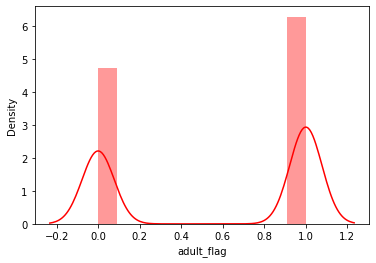

Boxplot of adult_flag
----------------------------------------------------------------------------


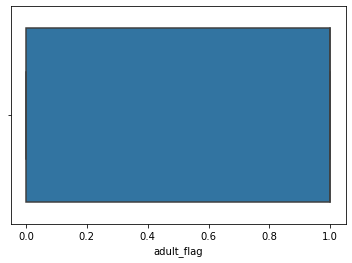

Description of daily_avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------
count    10585.000000
mean        13.959754
std          8.149337
min          0.000000
25%          8.000000
50%         12.000000
75%         19.000000
max         35.500000
Name: daily_avg_mins_spend_on_traveling_page, dtype: float64 


Distribution of daily_avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------


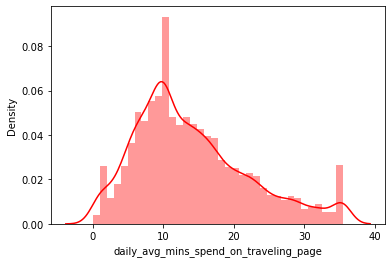

Boxplot of daily_avg_mins_spend_on_traveling_page
----------------------------------------------------------------------------


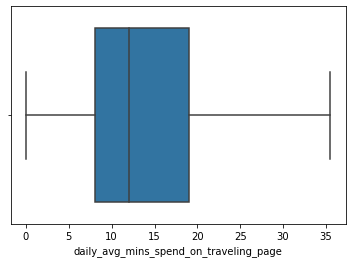

In [69]:
for i in df1_num:
    univariateAnalysis_numeric(i,9)

In [70]:
def univariateAnalysis_categorical(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1_cat[column].describe(include='O'),end=' ')
    print('')
    print('')
    print('')
    
    plt.figure()
    print("Bargraph of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(y=[column]);
    plt.show()

Description of taken_product
----------------------------------------------------------------------------
count     10585
unique        2
top          No
freq       8876
Name: taken_product, dtype: object 


Bargraph of taken_product
----------------------------------------------------------------------------


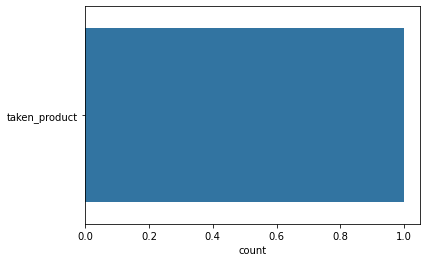

Description of preferred_device
----------------------------------------------------------------------------
count      10585
unique         2
top       Mobile
freq        9477
Name: preferred_device, dtype: object 


Bargraph of preferred_device
----------------------------------------------------------------------------


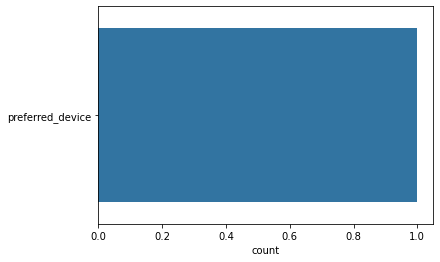

Description of preferred_location_type
----------------------------------------------------------------------------
count     10585
unique       11
top       Beach
freq       2455
Name: preferred_location_type, dtype: object 


Bargraph of preferred_location_type
----------------------------------------------------------------------------


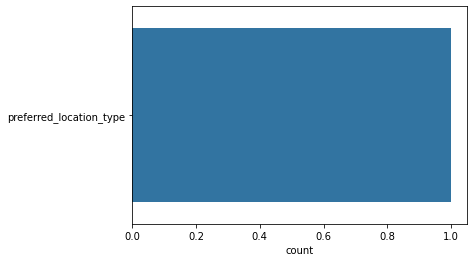

Description of following_company_page
----------------------------------------------------------------------------
count     10585
unique        2
top          No
freq       7615
Name: following_company_page, dtype: object 


Bargraph of following_company_page
----------------------------------------------------------------------------


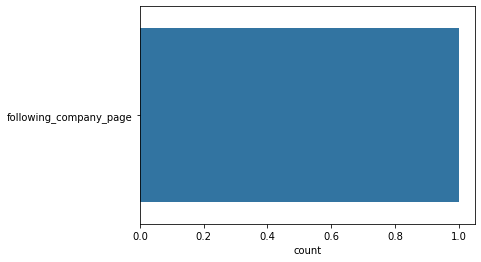

Description of working_flag
----------------------------------------------------------------------------
count     10585
unique        2
top          No
freq       8952
Name: working_flag, dtype: object 


Bargraph of working_flag
----------------------------------------------------------------------------


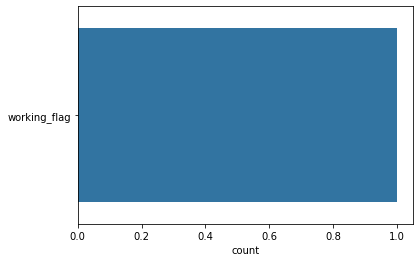

In [71]:
for i in df1_cat:
    univariateAnalysis_categorical(i,7)

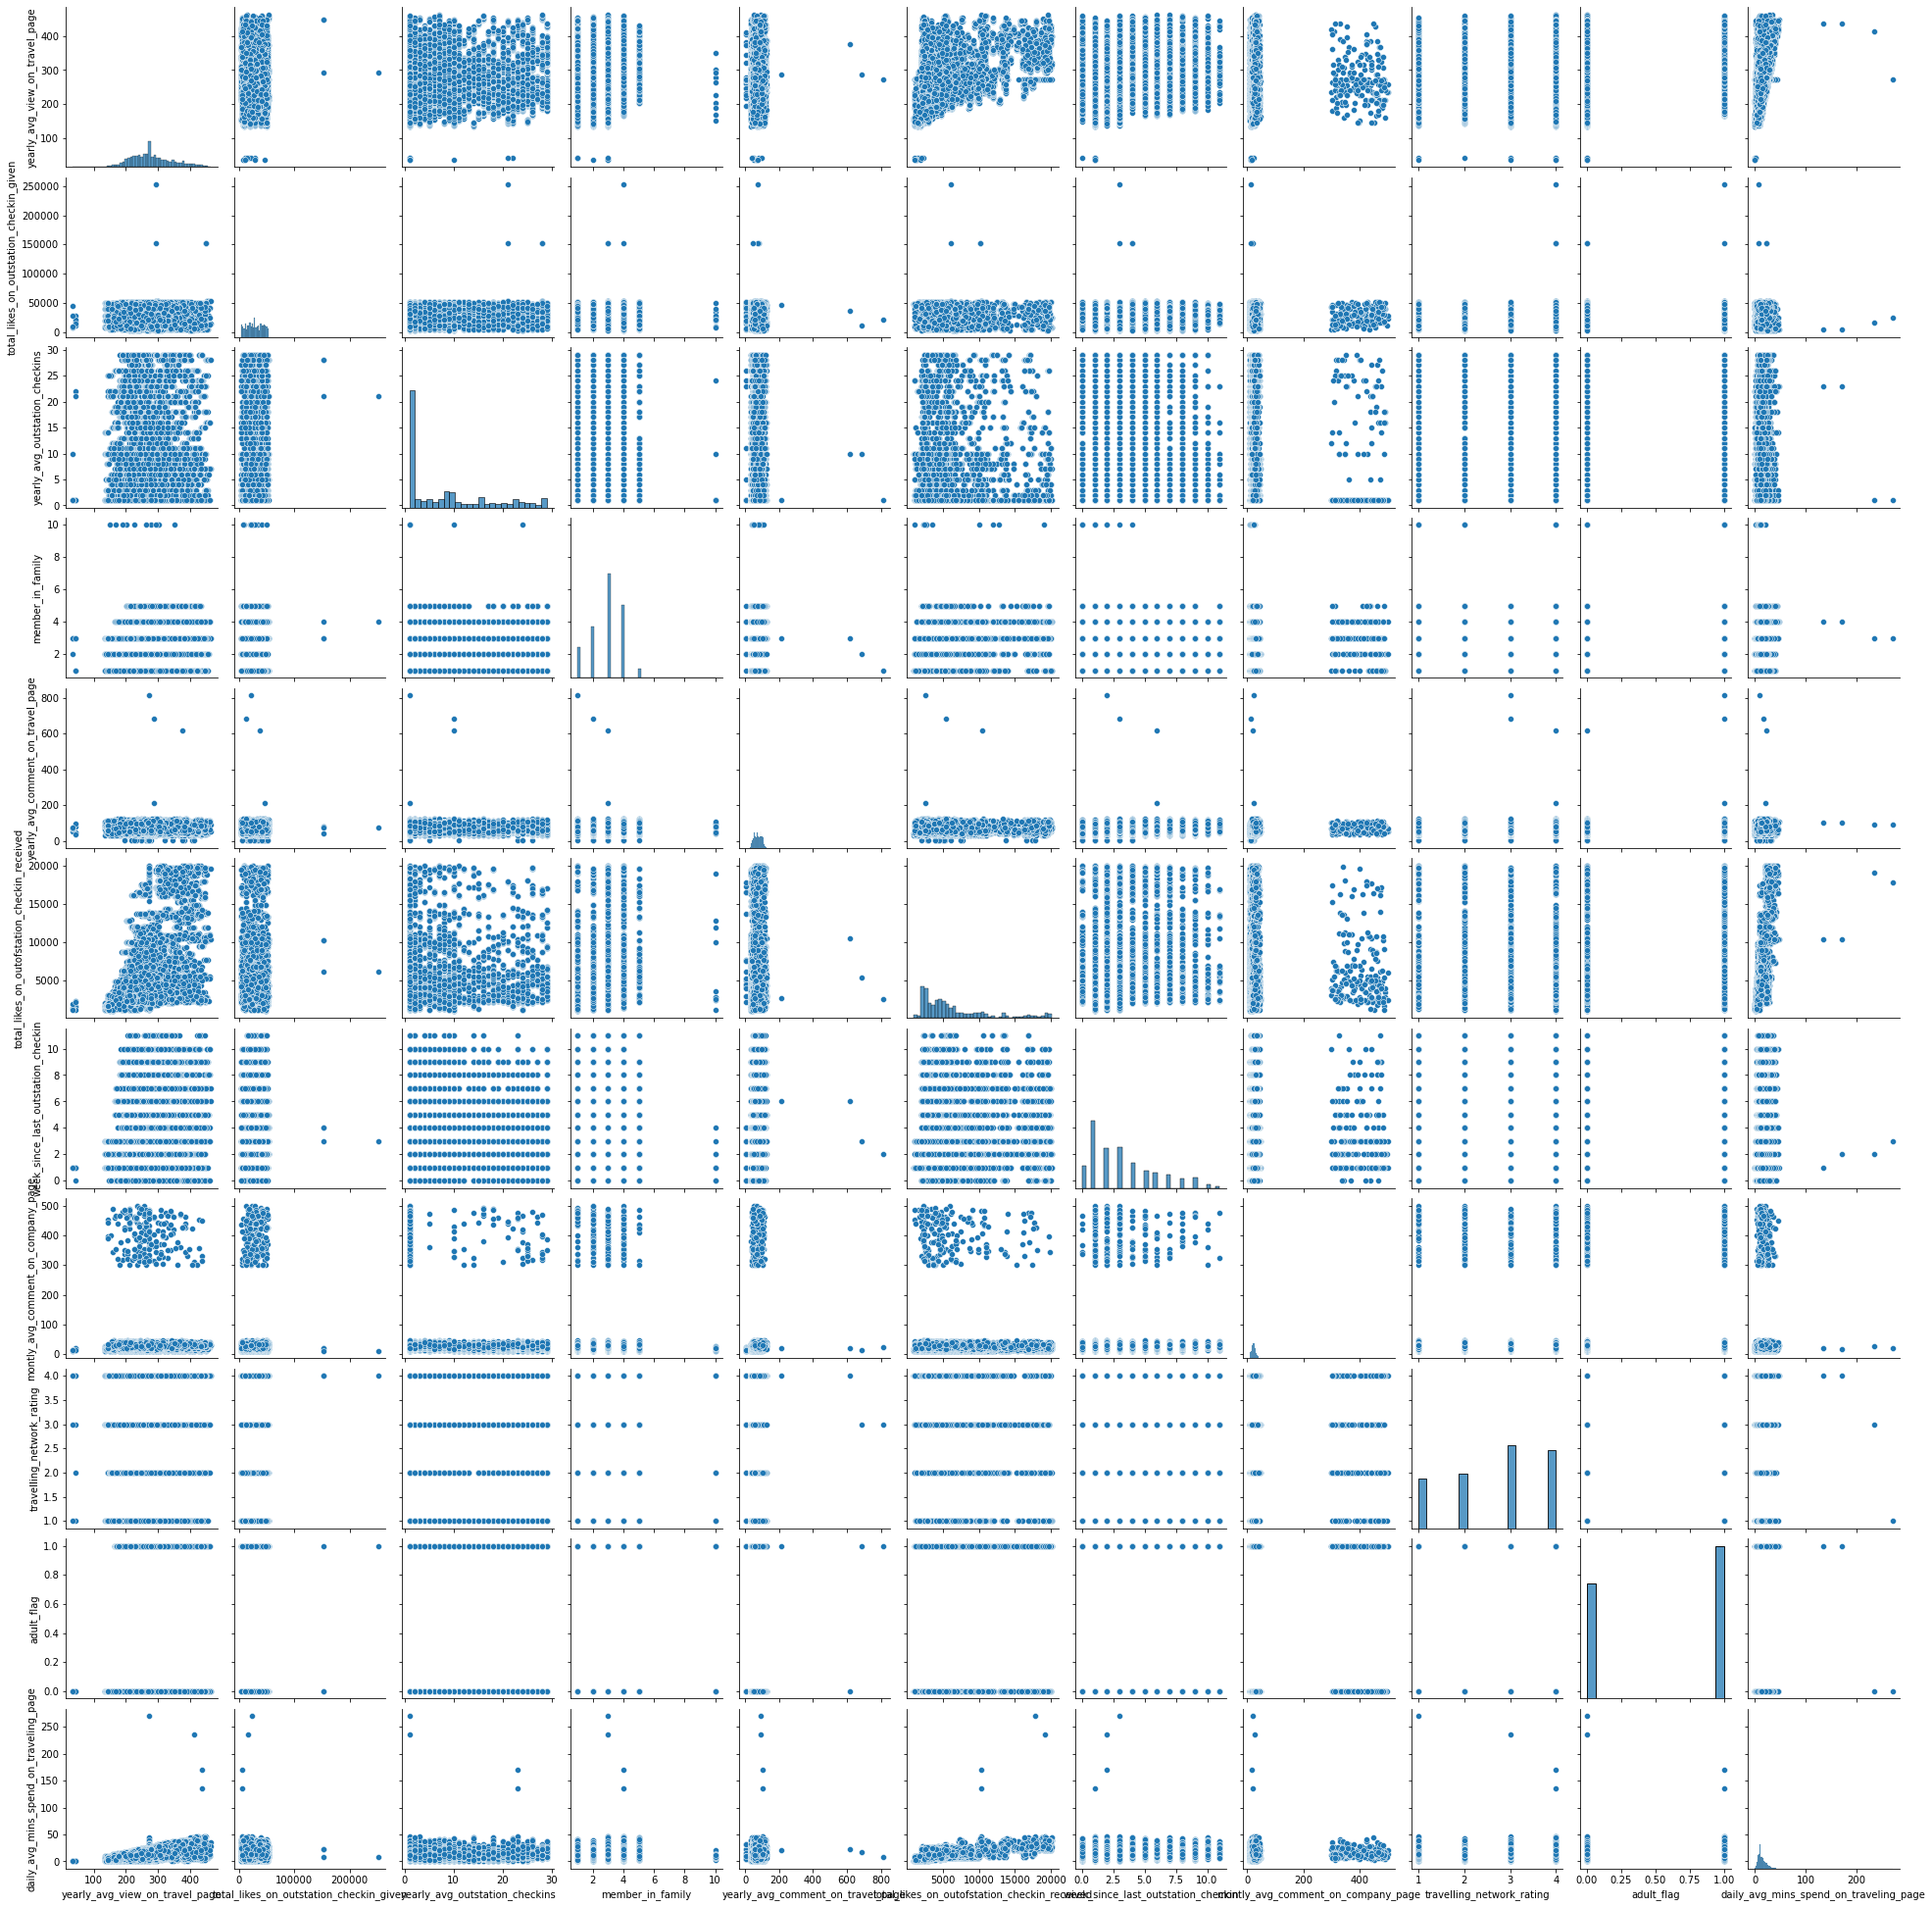

In [72]:
sns.pairplot(data = df1);

In [73]:
df1.corr()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,adult_flag,daily_avg_mins_spend_on_traveling_page
yearly_avg_view_on_travel_page,1.000000,0.012315,0.009807,0.191466,0.039020,0.487115,0.279824,-0.014132,0.056846,0.087831,0.575244
total_likes_on_outstation_checkin_given,0.012315,1.000000,0.005672,-0.010419,0.012610,0.012749,0.032767,0.012786,0.012143,0.034026,0.008785
yearly_avg_outstation_checkins,0.009807,0.005672,1.000000,0.016729,0.045124,-0.012815,-0.036679,-0.005825,0.002745,0.035578,0.003508
member_in_family,0.191466,-0.010419,0.016729,1.000000,0.004975,0.092015,0.110129,-0.009784,-0.010851,0.012006,0.119967
yearly_avg_comment_on_travel_page,0.039020,0.012610,0.045124,0.004975,1.000000,-0.013494,0.053310,0.007401,0.006037,0.035756,0.054033
total_likes_on_outofstation_checkin_received,0.487115,0.012749,-0.012815,0.092015,-0.013494,1.000000,0.146194,-0.005475,0.029688,0.058345,0.668503
week_since_last_outstation_checkin,0.279824,0.032767,-0.036679,0.110129,0.053310,0.146194,1.000000,0.027521,0.052919,0.018588,0.248518
montly_avg_comment_on_company_page,-0.014132,0.012786,-0.005825,-0.009784,0.007401,-0.005475,0.027521,1.000000,-0.021739,0.003913,0.048363
travelling_network_rating,0.056846,0.012143,0.002745,-0.010851,0.006037,0.029688,0.052919,-0.021739,1.000000,-0.057872,0.022050
adult_flag,0.087831,0.034026,0.035578,0.012006,0.035756,0.058345,0.018588,0.003913,-0.057872,1.000000,0.051451


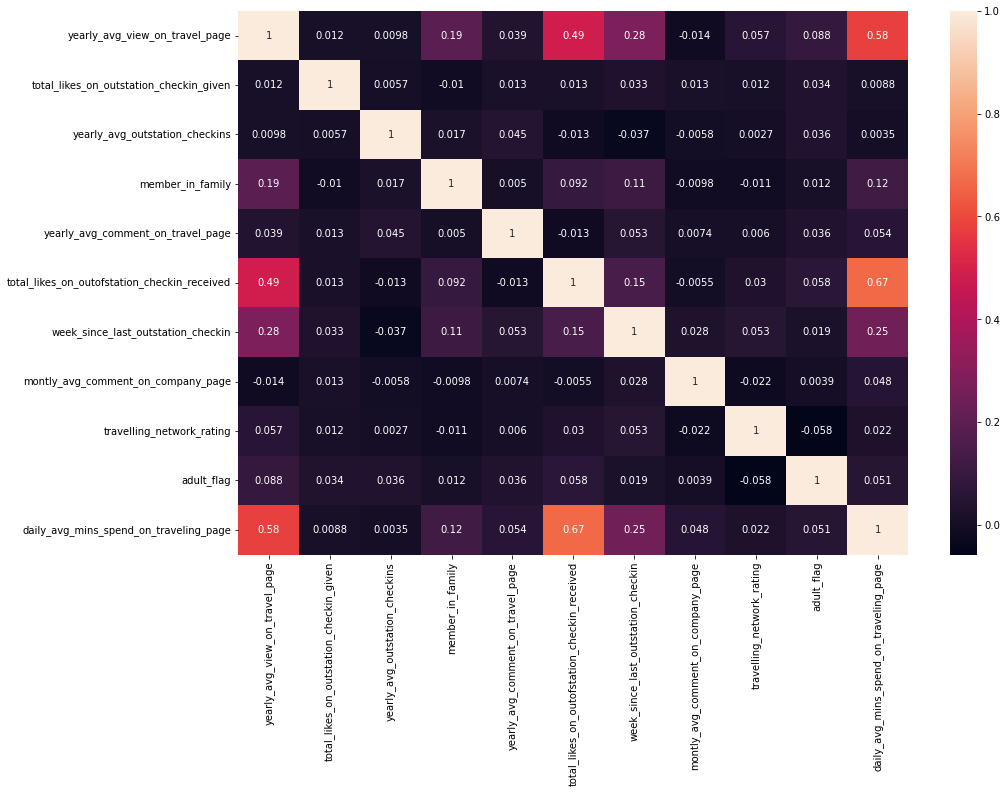

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True);

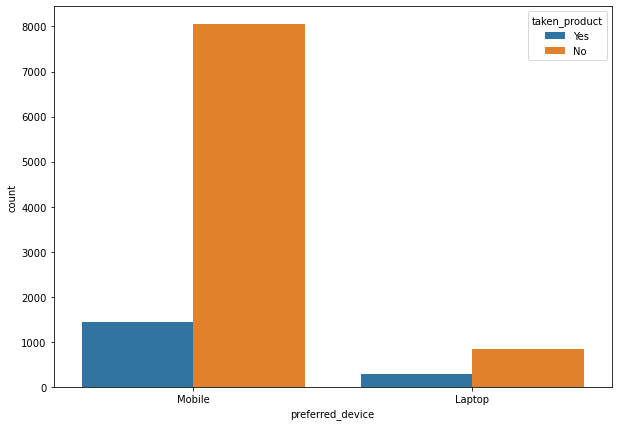

In [75]:
plt.figure(figsize = (10,7))
sns.countplot(x='preferred_device',hue='taken_product',data = df1 );

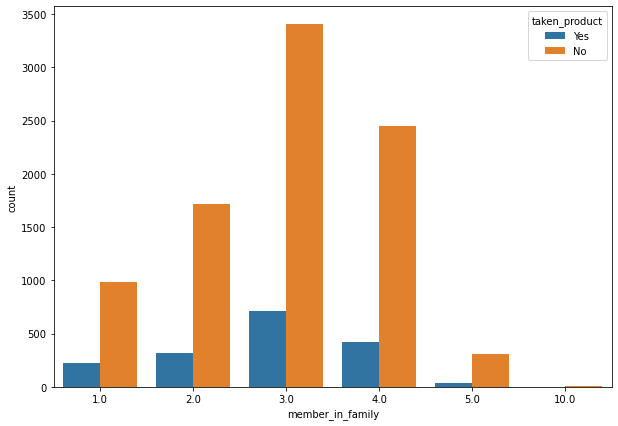

In [76]:
plt.figure(figsize = (10,7))
sns.countplot(x='member_in_family',hue='taken_product',data = df1 );

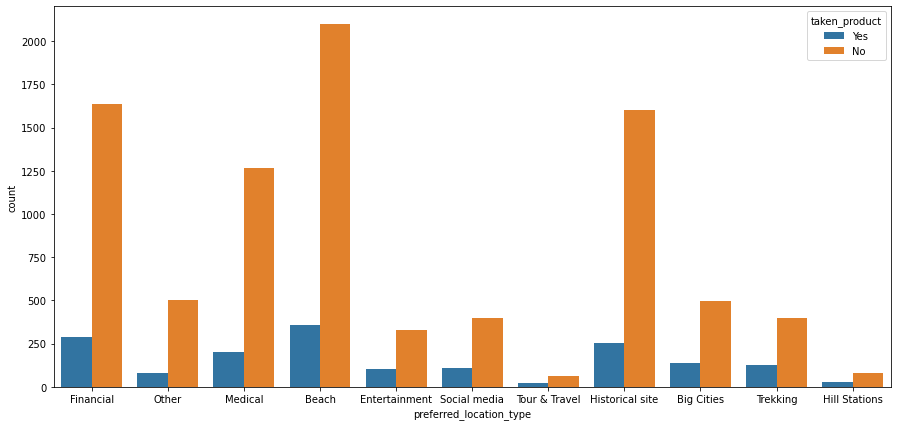

In [77]:
plt.figure(figsize = (15,7))
sns.countplot(x='preferred_location_type',hue='taken_product',data = df1 );

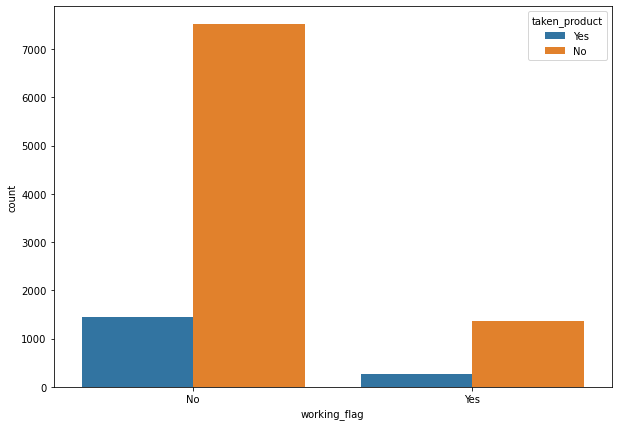

In [78]:
plt.figure(figsize = (10,7))
sns.countplot(x='working_flag',hue='taken_product',data = df1 );

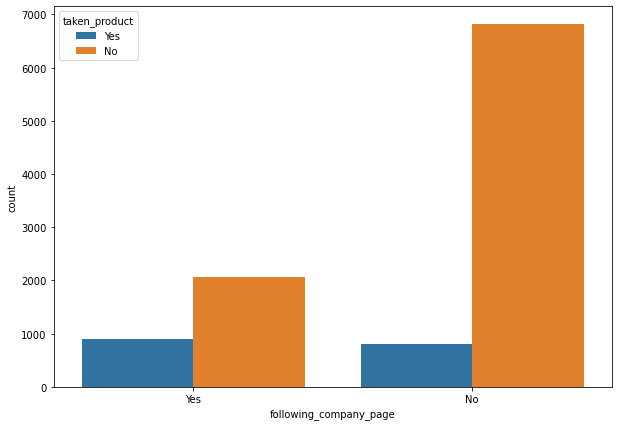

In [79]:
plt.figure(figsize = (10,7))
sns.countplot(x='following_company_page',hue='taken_product',data = df1 );

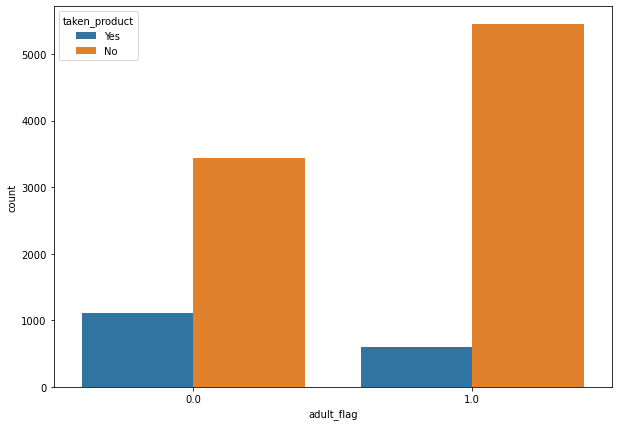

In [80]:
plt.figure(figsize = (10,7))
sns.countplot(x = 'adult_flag', hue = 'taken_product', data = df1 );

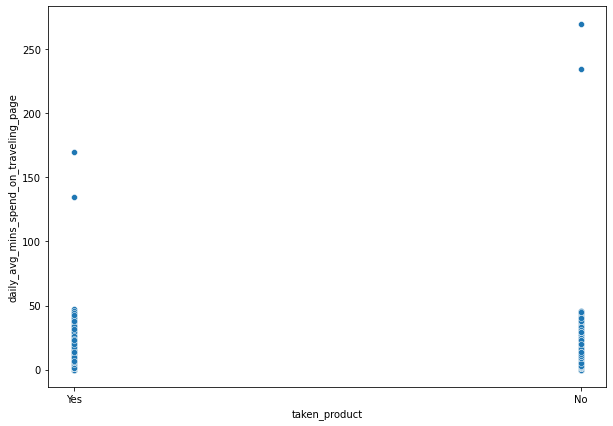

In [81]:
plt.figure(figsize = (10,7))
sns.scatterplot(y = 'daily_avg_mins_spend_on_traveling_page', x = 'taken_product', data = df1 );

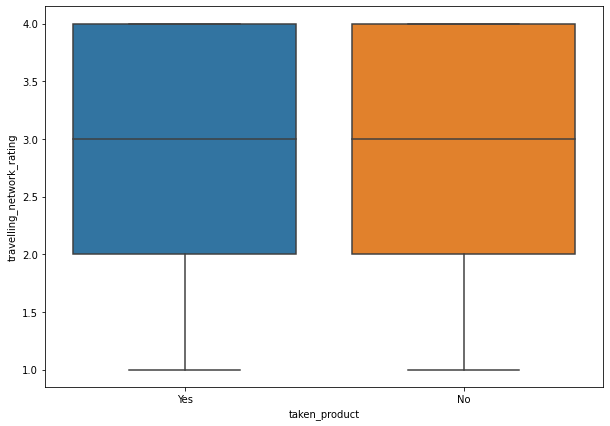

In [82]:
plt.figure(figsize = (10,7))
sns.boxplot(y = 'travelling_network_rating', x = 'taken_product', data = df1 );

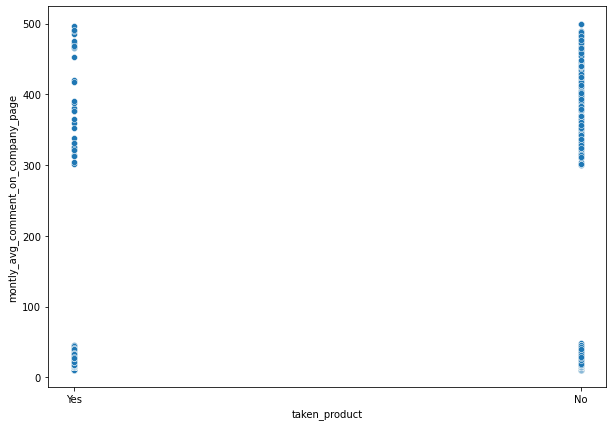

In [83]:
plt.figure(figsize = (10,7))
sns.scatterplot(y = 'montly_avg_comment_on_company_page', x = 'taken_product', data = df1 );

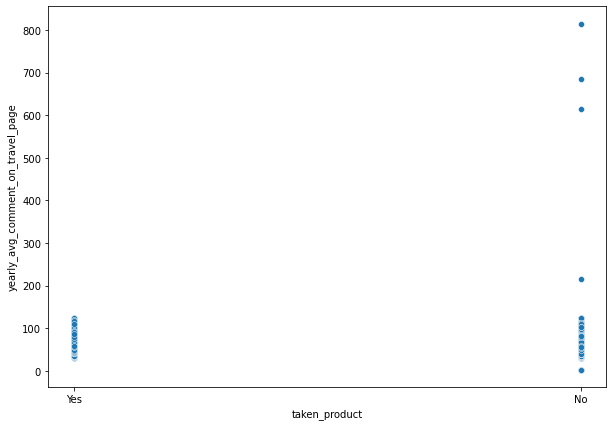

In [84]:
plt.figure(figsize = (10,7))
sns.scatterplot(y = 'yearly_avg_comment_on_travel_page', x = 'taken_product', data = df1 );

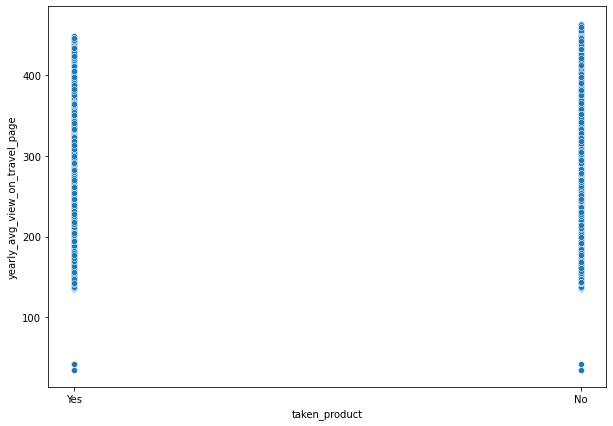

In [85]:
plt.figure(figsize = (10,7))
sns.scatterplot(y = 'yearly_avg_view_on_travel_page', x = 'taken_product', data = df1 );

In [86]:
df1_cat.columns

Index(['taken_product', 'preferred_device', 'preferred_location_type',
       'following_company_page', 'working_flag'],
      dtype='object')

In [87]:
df1 = pd.get_dummies(df1,columns=['adult_flag'], drop_first=True)
df1 = pd.get_dummies(df1,columns=['working_flag'], drop_first=True)
df1 = pd.get_dummies(df1,columns=['following_company_page'], drop_first=True)

In [88]:
df1.preferred_location_type.value_counts()

Beach              2455
Financial          1923
Historical site    1856
Medical            1471
Big Cities          636
Other               582
Trekking            528
Social media        511
Entertainment       431
Hill Stations       108
Tour & Travel        84
Name: preferred_location_type, dtype: int64

In [89]:
df1.preferred_location_type = df1.preferred_location_type.replace({'Tour & Travel':0,
                                                                    'Hill Stations':1,
                                                                    'Entertainment':2,
                                                                    'Social media':3,
                                                                    'Trekking':4,
                                                                    'Other':5,  
                                                                    'Big Cities':6,
                                                                    'Medical':7,
                                                                    'Historical site':8,
                                                                    'Financial':9,
                                                                    'Beach':10})

In [90]:
df1.preferred_location_type.value_counts()

10    2455
9     1923
8     1856
7     1471
6      636
5      582
4      528
3      511
2      431
1      108
0       84
Name: preferred_location_type, dtype: int64

In [91]:
df1.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_device,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,8.0,Yes,Mobile,9,0,0,1
1,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,No,Mobile,9,1,1,0
2,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,7.0,Yes,Mobile,5,0,0,1
3,247.0,48720.0,1.0,4.0,56.0,2909.0,1.0,11.0,3.0,8.0,No,Mobile,9,0,0,1
4,202.0,20685.0,1.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,No,Mobile,7,1,0,0


In [92]:
df1.shape

(10585, 16)

In [93]:
df1.taken_product.value_counts()

No     8876
Yes    1709
Name: taken_product, dtype: int64

In [94]:
df1.taken_product.value_counts(normalize = True)

No     0.838545
Yes    0.161455
Name: taken_product, dtype: float64

In [95]:
laptop = df1.loc[df1.preferred_device=='Laptop']

In [96]:
laptop.reset_index(inplace = True, drop = True)

In [97]:
laptop.drop('preferred_device', axis = 1, inplace = True)

In [98]:
laptop.taken_product = pd.Categorical(laptop.taken_product).codes

In [99]:
laptop.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,379.0,9776.0,8.0,1.0,64.0,5142.0,1.0,33.0,4.0,10.0,0,10,1,1,0
1,255.0,48725.0,3.0,4.0,59.0,2913.0,1.0,19.0,3.0,8.0,0,10,0,0,1
2,250.0,35184.0,2.0,2.0,84.0,3074.0,0.0,23.0,3.0,8.0,0,10,0,0,0
3,295.0,7572.0,23.0,3.0,48.0,9532.0,0.0,33.0,2.0,10.0,0,10,0,1,0
4,250.0,39379.0,16.0,1.0,80.0,3926.0,1.0,33.0,2.0,10.0,1,10,0,1,1


In [100]:
laptop.shape

(1108, 15)

In [101]:
laptop.to_csv('Laptop_Social_Media_Tourism_Data.csv')

In [102]:
mobile = df1.loc[df1.preferred_device=='Mobile']

In [103]:
mobile.reset_index(inplace = True, drop = True)

In [104]:
mobile.drop('preferred_device', axis = 1, inplace = True)

In [105]:
mobile.taken_product = pd.Categorical(mobile.taken_product).codes

In [106]:
mobile.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,8.0,1,9,0,0,1
1,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0,9,1,1,0
2,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,7.0,1,5,0,0,1
3,247.0,48720.0,1.0,4.0,56.0,2909.0,1.0,11.0,3.0,8.0,0,9,0,0,1
4,202.0,20685.0,1.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0,7,1,0,0


In [107]:
mobile.shape

(9477, 15)

In [108]:
mobile.to_csv('Mobile_Social_Media_Tourism_Data.csv')

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import set_config
set_config(print_changed_only = False)

In [110]:
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import tree
from os import system
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scipy.stats as stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Laptop Data

In [111]:
laptop = pd.read_csv('Laptop_Social_Media_Tourism_Data.csv')

In [112]:
laptop.head()

,Unnamed: 0,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,0,379.0,9776.0,8.0,1.0,64.0,5142.0,1.0,33.0,4.0,10.0,0,10,1,1,0
1,1,255.0,48725.0,3.0,4.0,59.0,2913.0,1.0,19.0,3.0,8.0,0,10,0,0,1
2,2,250.0,35184.0,2.0,2.0,84.0,3074.0,0.0,23.0,3.0,8.0,0,10,0,0,0
3,3,295.0,7572.0,23.0,3.0,48.0,9532.0,0.0,33.0,2.0,10.0,0,10,0,1,0
4,4,250.0,39379.0,16.0,1.0,80.0,3926.0,1.0,33.0,2.0,10.0,1,10,0,1,1


In [113]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    1108 non-null   int64  
 1   yearly_avg_view_on_travel_page                1108 non-null   float64
 2   total_likes_on_outstation_checkin_given       1108 non-null   float64
 3   yearly_avg_outstation_checkins                1108 non-null   float64
 4   member_in_family                              1108 non-null   float64
 5   yearly_avg_comment_on_travel_page             1108 non-null   float64
 6   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 7   week_since_last_outstation_checkin            1108 non-null   float64
 8   montly_avg_comment_on_company_page            1108 non-null   float64
 9   travelling_network_rating                     1108 non-null   f

In [114]:
laptop.drop('Unnamed: 0', axis = 1, inplace = True)

In [115]:
laptop.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,379.0,9776.0,8.0,1.0,64.0,5142.0,1.0,33.0,4.0,10.0,0,10,1,1,0
1,255.0,48725.0,3.0,4.0,59.0,2913.0,1.0,19.0,3.0,8.0,0,10,0,0,1
2,250.0,35184.0,2.0,2.0,84.0,3074.0,0.0,23.0,3.0,8.0,0,10,0,0,0
3,295.0,7572.0,23.0,3.0,48.0,9532.0,0.0,33.0,2.0,10.0,0,10,0,1,0
4,250.0,39379.0,16.0,1.0,80.0,3926.0,1.0,33.0,2.0,10.0,1,10,0,1,1


In [116]:
laptop.tail()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
1103,278.0,24127.0,4.0,2.0,115.0,5184.0,7.0,35.0,2.0,23.0,0,10,1,0,0
1104,388.0,30775.0,1.0,4.0,109.0,6787.0,8.0,29.0,4.0,14.0,1,10,1,0,0
1105,268.0,42010.0,18.0,4.0,98.0,5753.0,2.0,34.0,4.0,17.0,0,10,1,0,1
1106,279.0,30987.0,23.0,2.0,58.0,2616.0,4.0,36.0,3.0,23.0,0,8,1,0,0
1107,382.0,35851.0,2.0,3.0,83.0,5444.0,3.0,32.0,4.0,20.0,0,8,0,0,0


In [117]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   yearly_avg_view_on_travel_page                1108 non-null   float64
 1   total_likes_on_outstation_checkin_given       1108 non-null   float64
 2   yearly_avg_outstation_checkins                1108 non-null   float64
 3   member_in_family                              1108 non-null   float64
 4   yearly_avg_comment_on_travel_page             1108 non-null   float64
 5   total_likes_on_outofstation_checkin_received  1108 non-null   float64
 6   week_since_last_outstation_checkin            1108 non-null   float64
 7   montly_avg_comment_on_company_page            1108 non-null   float64
 8   travelling_network_rating                     1108 non-null   float64
 9   daily_avg_mins_spend_on_traveling_page        1108 non-null   f

In [118]:
laptop.shape

(1108, 15)

In [119]:
laptop.describe().T

,count,mean,std,min,25%,50%,75%,max
yearly_avg_view_on_travel_page,1108.0,282.130866,64.242174,138.0,237.00,270.5,325.00,463.0
total_likes_on_outstation_checkin_given,1108.0,27769.664260,13361.837042,3818.0,17650.25,26942.5,39380.25,52512.0
yearly_avg_outstation_checkins,1108.0,9.277978,8.409913,1.0,2.00,7.0,15.00,29.0
member_in_family,1108.0,2.895307,1.044561,1.0,2.00,3.0,4.00,5.0
yearly_avg_comment_on_travel_page,1108.0,77.496390,21.039323,33.0,60.00,77.0,95.00,125.0
total_likes_on_outofstation_checkin_received,1108.0,6226.317690,4365.994064,1098.0,2884.00,4759.5,7979.50,19905.0
week_since_last_outstation_checkin,1108.0,2.998195,2.493351,0.0,1.00,2.0,4.00,11.0
montly_avg_comment_on_company_page,1108.0,26.398917,6.187063,14.0,22.00,26.0,31.00,46.0
travelling_network_rating,1108.0,2.776173,1.078864,1.0,2.00,3.0,4.00,4.0
daily_avg_mins_spend_on_traveling_page,1108.0,13.625451,8.164610,0.0,8.00,11.5,18.00,40.0


In [120]:
X = laptop.drop('taken_product', axis = 1)
y = laptop.pop('taken_product')

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

## Decision Tree

### Base Model

In [122]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [123]:
dTree = dt_model.fit(X_train, y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

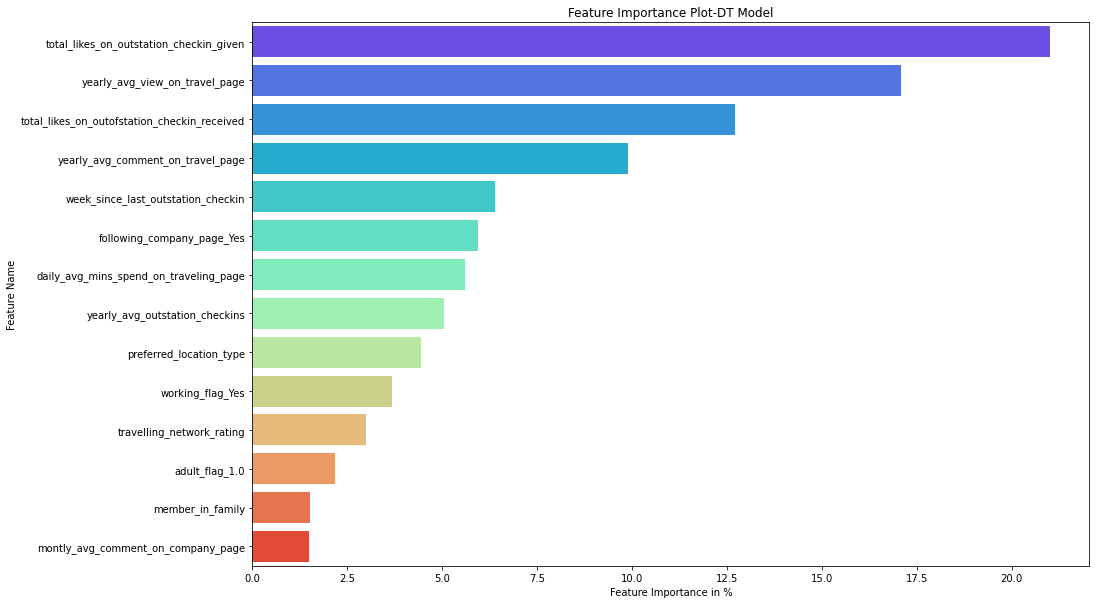

In [124]:
x = pd.DataFrame(dTree.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [125]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outstation_checkin_given       21.000132
yearly_avg_view_on_travel_page                17.096843
total_likes_on_outofstation_checkin_received  12.714148
yearly_avg_comment_on_travel_page              9.895381
week_since_last_outstation_checkin             6.399029
following_company_page_Yes                     5.943487
daily_avg_mins_spend_on_traveling_page         5.605866
yearly_avg_outstation_checkins                 5.051164
preferred_location_type                        4.434573
working_flag_Yes                               3.688279
travelling_network_rating                      2.996516
adult_flag_1.0                                 2.173599
member_in_family                               1.518905
montly_avg_comment_on_company_page             1.482079


In [126]:
ytrain_predict = dTree.predict(X_train)
ytest_predict = dTree.predict(X_test)

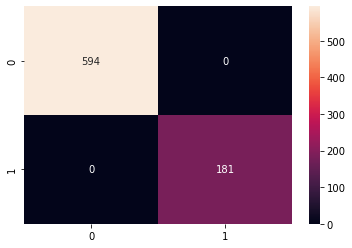

In [127]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [128]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



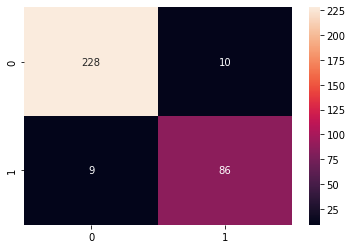

In [129]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [130]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       238
           1       0.90      0.91      0.90        95

    accuracy                           0.94       333
   macro avg       0.93      0.93      0.93       333
weighted avg       0.94      0.94      0.94       333



AUC 1.000


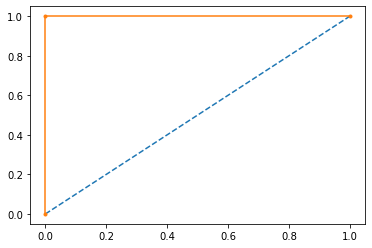

In [131]:
probs = dTree.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.932


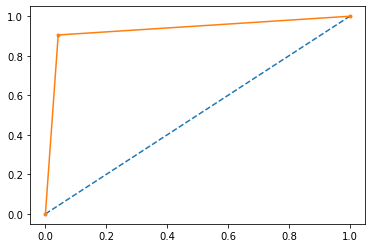

In [132]:
probs = dTree.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Decision Tree Model Tuning

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [134]:
dt_model = DecisionTreeClassifier(criterion = 'gini')
dTree = dt_model.fit(X_train, y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [135]:
train_char_labels = ['No', 'Yes']
Credit_Tree_File = open('D:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_labels))
Credit_Tree_File.close()

In [136]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [137]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=1)
dTreeR.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

In [138]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('D:\credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

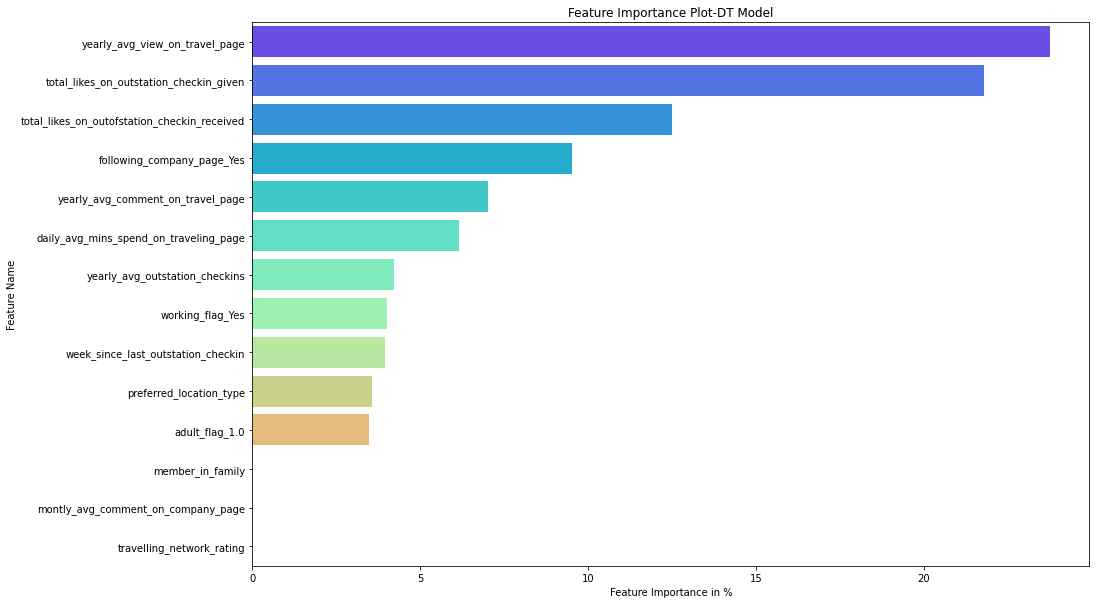

In [139]:
x = pd.DataFrame(dTreeR.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [140]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
yearly_avg_view_on_travel_page                23.756552
total_likes_on_outstation_checkin_given       21.788080
total_likes_on_outofstation_checkin_received  12.509837
following_company_page_Yes                     9.530934
yearly_avg_comment_on_travel_page              7.023685
daily_avg_mins_spend_on_traveling_page         6.164950
yearly_avg_outstation_checkins                 4.206886
working_flag_Yes                               4.007218
week_since_last_outstation_checkin             3.956118
preferred_location_type                        3.570172
adult_flag_1.0                                 3.485568
member_in_family                               0.000000
montly_avg_comment_on_company_page             0.000000
travelling_network_rating                      0.000000


In [141]:
param_grid = {
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'max_depth':[4, 6, 8, 10],
}

In [142]:
grid_search = GridSearchCV(estimator=dTreeR, param_grid=param_grid, cv=3)

In [143]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=1, splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs',

In [144]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [145]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

In [146]:
best_grid = grid_search.best_estimator_

In [147]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

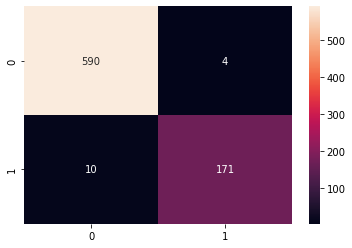

In [148]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [149]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       594
           1       0.98      0.94      0.96       181

    accuracy                           0.98       775
   macro avg       0.98      0.97      0.97       775
weighted avg       0.98      0.98      0.98       775



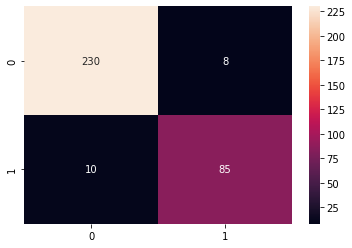

In [150]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [151]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       238
           1       0.91      0.89      0.90        95

    accuracy                           0.95       333
   macro avg       0.94      0.93      0.93       333
weighted avg       0.95      0.95      0.95       333



AUC 0.995


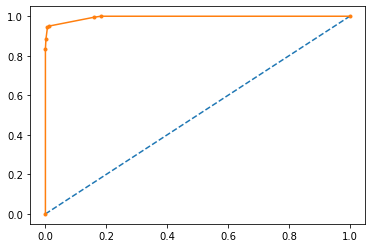

In [152]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.946


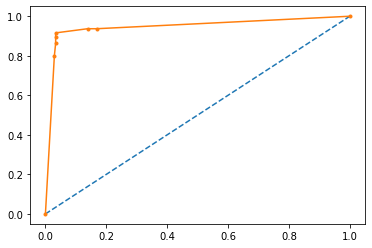

In [153]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Random Forest

### Base Model

In [154]:
rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

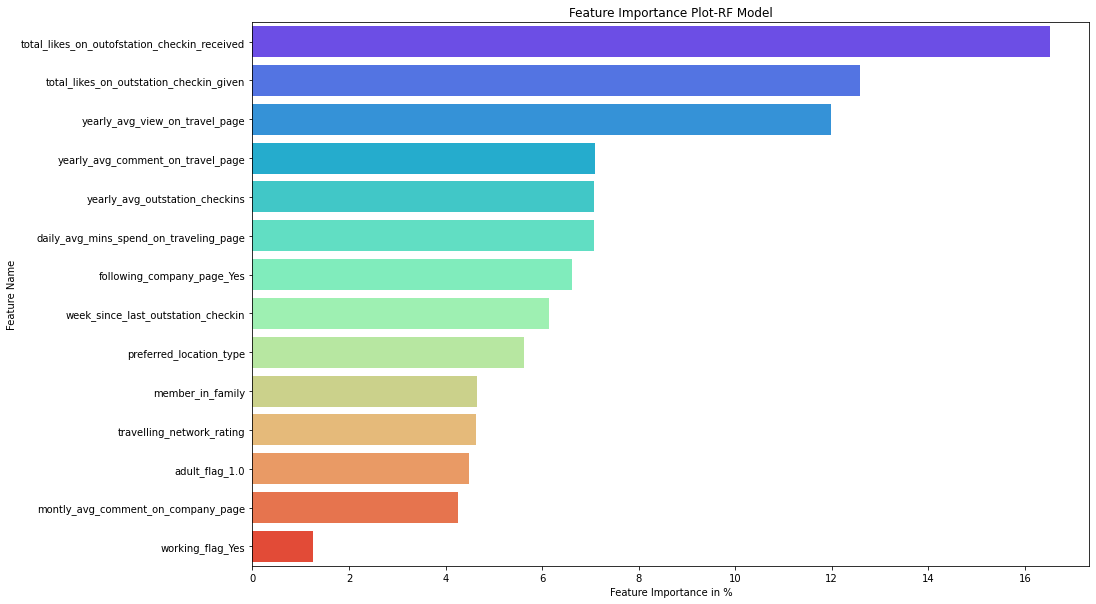

In [429]:
x = pd.DataFrame(rfcl.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-RF Model')
plt.show()

In [156]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
yearly_avg_view_on_travel_page                16.479907
total_likes_on_outofstation_checkin_received  15.938347
total_likes_on_outstation_checkin_given       11.825723
yearly_avg_outstation_checkins                 9.036601
yearly_avg_comment_on_travel_page              7.682440
daily_avg_mins_spend_on_traveling_page         7.528226
montly_avg_comment_on_company_page             5.271044
following_company_page_Yes                     5.248259
preferred_location_type                        5.128265
week_since_last_outstation_checkin             4.471052
travelling_network_rating                      4.293074
member_in_family                               3.441662
adult_flag_1.0                                 2.329558
working_flag_Yes                               1.325844


In [157]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

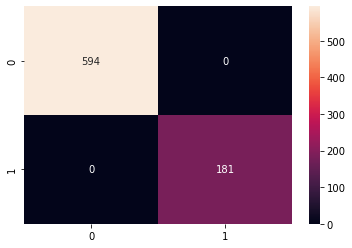

In [158]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [159]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



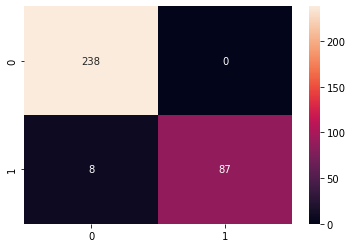

In [160]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [161]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       238
           1       1.00      0.92      0.96        95

    accuracy                           0.98       333
   macro avg       0.98      0.96      0.97       333
weighted avg       0.98      0.98      0.98       333



AUC 1.000


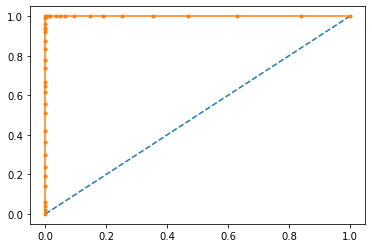

In [162]:
probs = rfcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 1.000


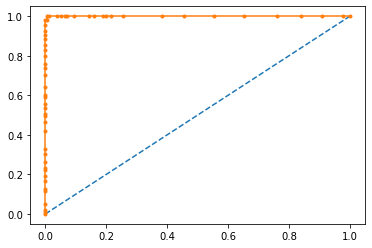

In [163]:
probs = rfcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Random Forest Model Tuning

In [164]:
rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

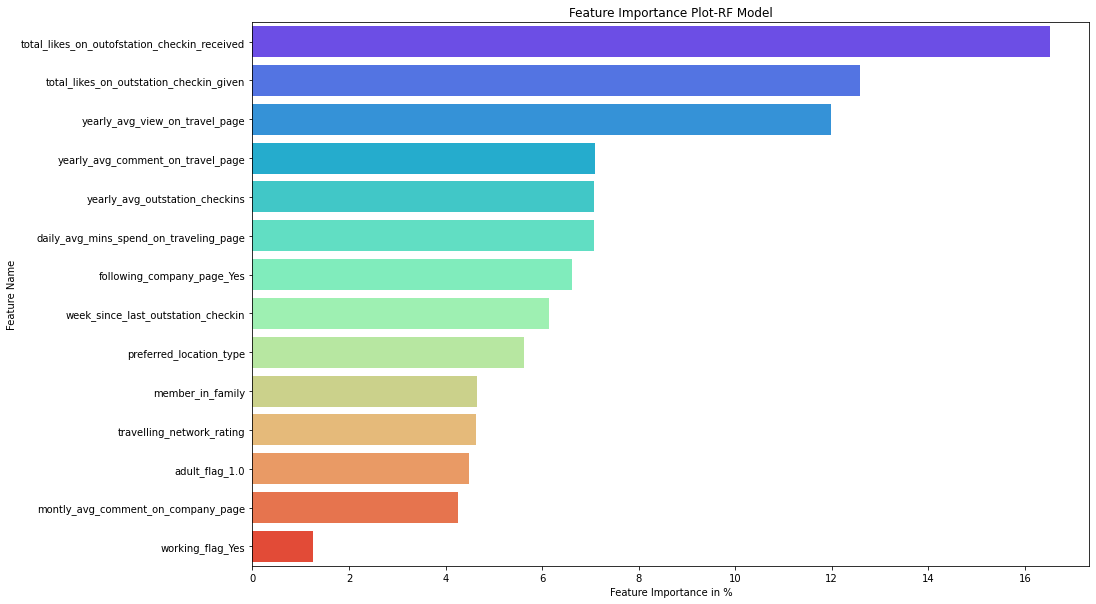

In [430]:
x = pd.DataFrame(rfcl.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-RF Model')
plt.show()

In [166]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
yearly_avg_view_on_travel_page                16.479907
total_likes_on_outofstation_checkin_received  15.938347
total_likes_on_outstation_checkin_given       11.825723
yearly_avg_outstation_checkins                 9.036601
yearly_avg_comment_on_travel_page              7.682440
daily_avg_mins_spend_on_traveling_page         7.528226
montly_avg_comment_on_company_page             5.271044
following_company_page_Yes                     5.248259
preferred_location_type                        5.128265
week_since_last_outstation_checkin             4.471052
travelling_network_rating                      4.293074
member_in_family                               3.441662
adult_flag_1.0                                 2.329558
working_flag_Yes                               1.325844


In [167]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [101,301,501]    
}

In [168]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [169]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [170]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 501}

In [171]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=501,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [172]:
best_grid = grid_search.best_estimator_

In [173]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

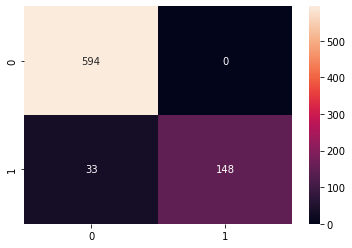

In [174]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [175]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       594
           1       1.00      0.82      0.90       181

    accuracy                           0.96       775
   macro avg       0.97      0.91      0.94       775
weighted avg       0.96      0.96      0.96       775



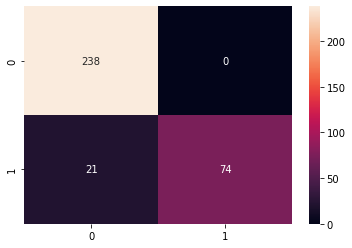

In [176]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [177]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       238
           1       1.00      0.78      0.88        95

    accuracy                           0.94       333
   macro avg       0.96      0.89      0.92       333
weighted avg       0.94      0.94      0.93       333



AUC 0.999


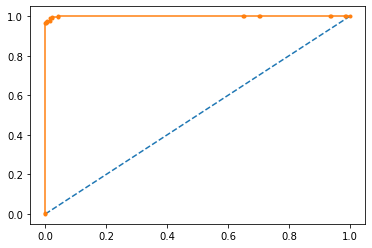

In [178]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.993


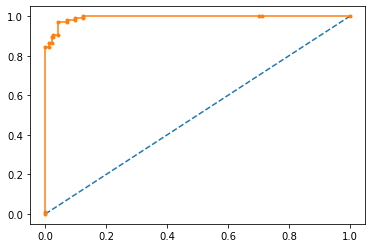

In [179]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Logistic Regression

### Base Model

In [180]:
laptop.median()

yearly_avg_view_on_travel_page                    270.5
total_likes_on_outstation_checkin_given         26942.5
yearly_avg_outstation_checkins                      7.0
member_in_family                                    3.0
yearly_avg_comment_on_travel_page                  77.0
total_likes_on_outofstation_checkin_received     4759.5
week_since_last_outstation_checkin                  2.0
montly_avg_comment_on_company_page                 26.0
travelling_network_rating                           3.0
daily_avg_mins_spend_on_traveling_page             11.5
preferred_location_type                             8.0
adult_flag_1.0                                      1.0
working_flag_Yes                                    0.0
following_company_page_Yes                          0.0
dtype: float64

In [181]:
laptop.std()

yearly_avg_view_on_travel_page                     64.242174
total_likes_on_outstation_checkin_given         13361.837042
yearly_avg_outstation_checkins                      8.409913
member_in_family                                    1.044561
yearly_avg_comment_on_travel_page                  21.039323
total_likes_on_outofstation_checkin_received     4365.994064
week_since_last_outstation_checkin                  2.493351
montly_avg_comment_on_company_page                  6.187063
travelling_network_rating                           1.078864
daily_avg_mins_spend_on_traveling_page              8.164610
preferred_location_type                             2.211835
adult_flag_1.0                                      0.496217
working_flag_Yes                                    0.372307
following_company_page_Yes                          0.462895
dtype: float64

In [182]:
sc = MinMaxScaler()

In [183]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [184]:
lr_model = LogisticRegression(random_state = 1)
lo_reg = lr_model.fit(X_train, y_train)
lo_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
ytrain_predict = lo_reg.predict(X_train)
ytest_predict = lo_reg.predict(X_test)

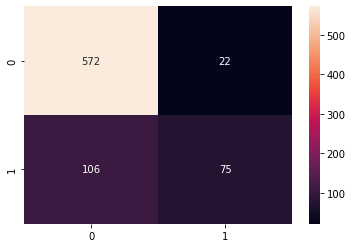

In [186]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [187]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       594
           1       0.77      0.41      0.54       181

    accuracy                           0.83       775
   macro avg       0.81      0.69      0.72       775
weighted avg       0.83      0.83      0.82       775



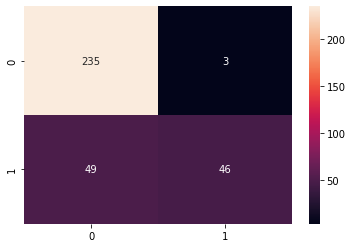

In [188]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [189]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       238
           1       0.94      0.48      0.64        95

    accuracy                           0.84       333
   macro avg       0.88      0.74      0.77       333
weighted avg       0.86      0.84      0.83       333



AUC 0.815


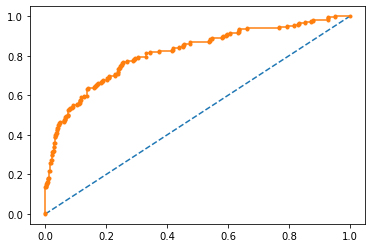

In [190]:
probs = lo_reg.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.862


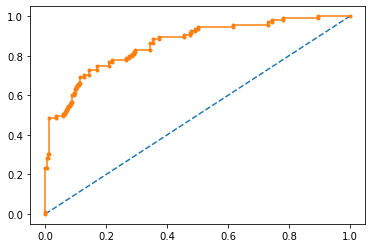

In [191]:
probs = lo_reg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Logistic Regression Model Tuning

In [192]:
lr_model = LogisticRegression(random_state=1)

In [193]:
param_grid = {
    'penalty':['l2','none','l1'],
    'max_iter':[100,500,1000],
    'n_jobs':[-1,0,1],
    'solver':['lbfgs','newton-cg','sag']
    }

In [194]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3)

In [195]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'max_iter': [100, 500, 1000], 'n_jobs': [-1, 0, 1],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [196]:
grid_search.best_params_

{'max_iter': 100, 'n_jobs': -1, 'penalty': 'none', 'solver': 'lbfgs'}

In [197]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [198]:
best_grid = grid_search.best_estimator_

In [199]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

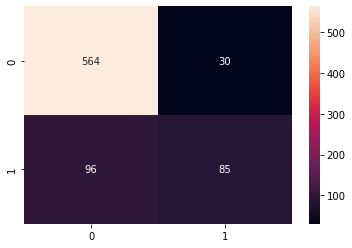

In [200]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [201]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       594
           1       0.74      0.47      0.57       181

    accuracy                           0.84       775
   macro avg       0.80      0.71      0.74       775
weighted avg       0.83      0.84      0.82       775



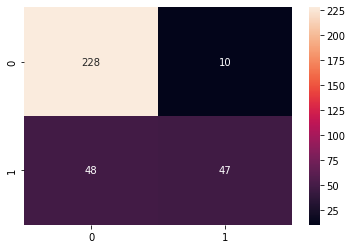

In [202]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [203]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89       238
           1       0.82      0.49      0.62        95

    accuracy                           0.83       333
   macro avg       0.83      0.73      0.75       333
weighted avg       0.83      0.83      0.81       333



AUC 0.816


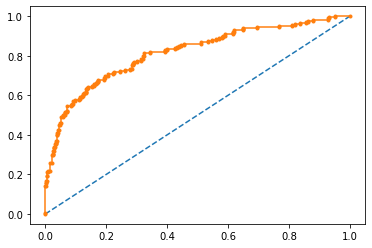

In [204]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.863


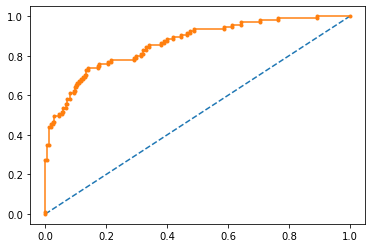

In [205]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Linear Discriminate Analysis

In [206]:
lda_model = LinearDiscriminantAnalysis()
lda = lda_model.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [207]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

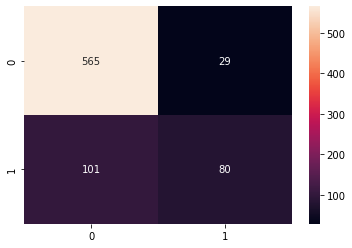

In [208]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [209]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       594
           1       0.73      0.44      0.55       181

    accuracy                           0.83       775
   macro avg       0.79      0.70      0.72       775
weighted avg       0.82      0.83      0.82       775



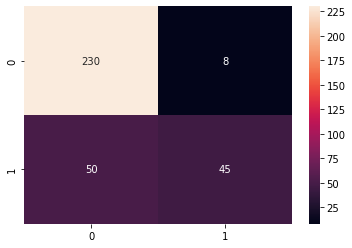

In [210]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [211]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       238
           1       0.85      0.47      0.61        95

    accuracy                           0.83       333
   macro avg       0.84      0.72      0.75       333
weighted avg       0.83      0.83      0.81       333



AUC 0.812


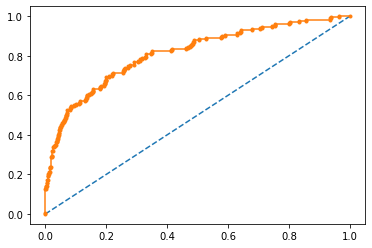

In [212]:
probs = lda.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.861


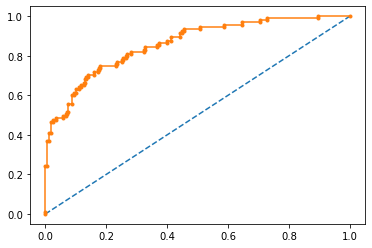

In [213]:
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## K Nearest Neighbour

### Base Model

In [214]:
NNH = KNeighborsClassifier( n_neighbors = 5, weights = 'distance')

In [215]:
knn = NNH.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [216]:
ytrain_predict = knn.predict(X_train)
ytest_predict = knn.predict(X_test)

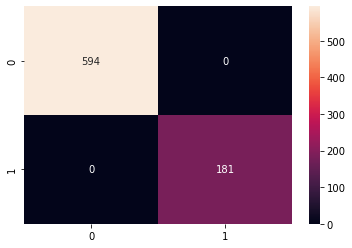

In [217]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [218]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



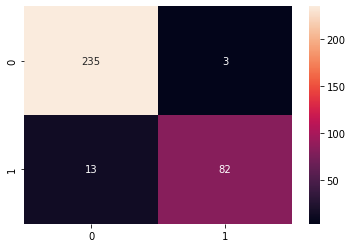

In [219]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [220]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       238
           1       0.96      0.86      0.91        95

    accuracy                           0.95       333
   macro avg       0.96      0.93      0.94       333
weighted avg       0.95      0.95      0.95       333



AUC 1.000


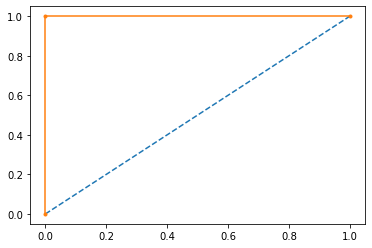

In [221]:
probs = knn.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.992


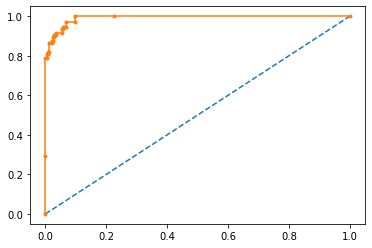

In [222]:
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### KNN Model Tuning

In [223]:
kncl = KNeighborsClassifier()

In [224]:
param_grid ={  'n_neighbors': range(1,20),
               'weights' : ['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }

In [225]:
grid_search = GridSearchCV(estimator=kncl, param_grid=param_grid, cv=3)

In [226]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [227]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [228]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [229]:
best_grid = grid_search.best_estimator_

In [230]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

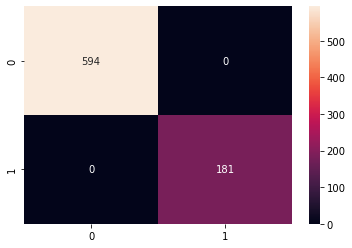

In [231]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [232]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



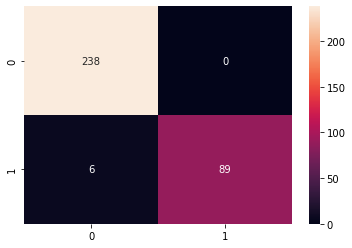

In [233]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [234]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



AUC 1.000


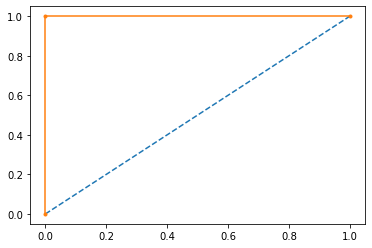

In [235]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.968


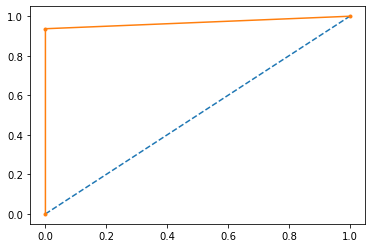

In [236]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Naive Bayes

In [237]:
NB_model = GaussianNB()
nb = NB_model.fit(X_train, y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [238]:
ytrain_predict = nb.predict(X_train)
ytest_predict = nb.predict(X_test)

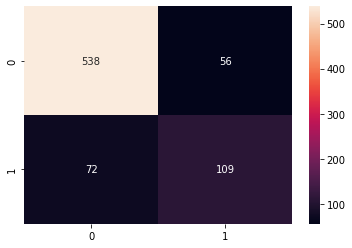

In [239]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [240]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       594
           1       0.66      0.60      0.63       181

    accuracy                           0.83       775
   macro avg       0.77      0.75      0.76       775
weighted avg       0.83      0.83      0.83       775



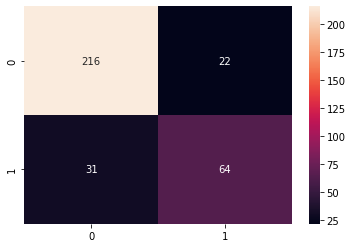

In [241]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [242]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       238
           1       0.74      0.67      0.71        95

    accuracy                           0.84       333
   macro avg       0.81      0.79      0.80       333
weighted avg       0.84      0.84      0.84       333



AUC 0.806


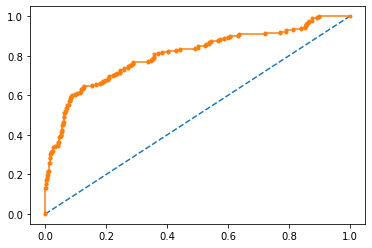

In [243]:
probs = nb.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.846


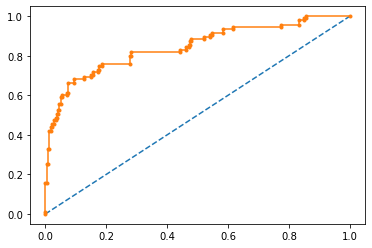

In [244]:
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Ensemble Modelling

### Bagging

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [246]:
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [247]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

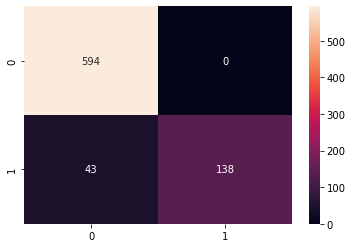

In [248]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [249]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97       594
           1       1.00      0.76      0.87       181

    accuracy                           0.94       775
   macro avg       0.97      0.88      0.92       775
weighted avg       0.95      0.94      0.94       775



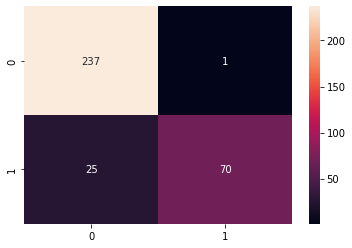

In [250]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [251]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       238
           1       0.99      0.74      0.84        95

    accuracy                           0.92       333
   macro avg       0.95      0.87      0.90       333
weighted avg       0.93      0.92      0.92       333



AUC 0.992


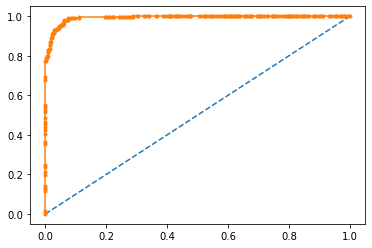

In [252]:
probs = bgcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.978


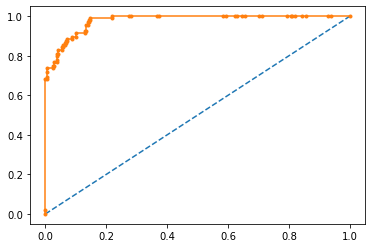

In [253]:
probs = bgcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Ada Boosting

In [254]:
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [255]:
ytrain_predict = abcl.predict(X_train)
ytest_predict = abcl.predict(X_test)

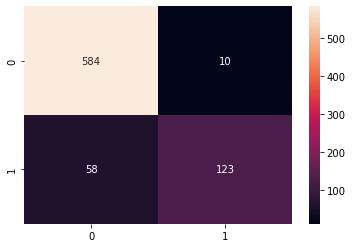

In [256]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [257]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       594
           1       0.92      0.68      0.78       181

    accuracy                           0.91       775
   macro avg       0.92      0.83      0.86       775
weighted avg       0.91      0.91      0.91       775



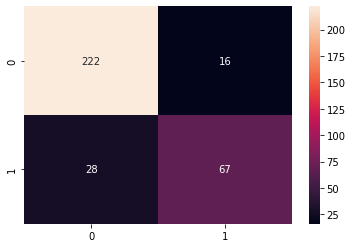

In [258]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [259]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       238
           1       0.81      0.71      0.75        95

    accuracy                           0.87       333
   macro avg       0.85      0.82      0.83       333
weighted avg       0.86      0.87      0.87       333



AUC 0.967


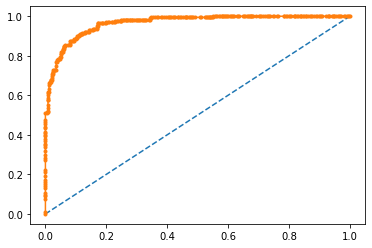

In [260]:
probs = abcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.927


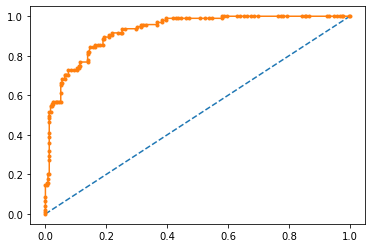

In [261]:
probs = abcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Gradient Boosting

In [262]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [263]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)

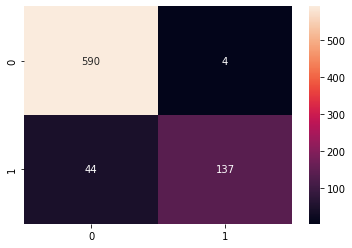

In [264]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [265]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       594
           1       0.97      0.76      0.85       181

    accuracy                           0.94       775
   macro avg       0.95      0.88      0.91       775
weighted avg       0.94      0.94      0.94       775



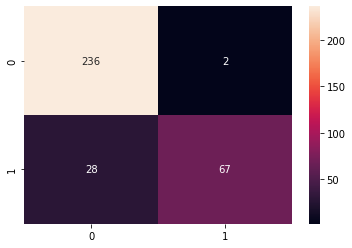

In [266]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [267]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       238
           1       0.97      0.71      0.82        95

    accuracy                           0.91       333
   macro avg       0.93      0.85      0.88       333
weighted avg       0.92      0.91      0.91       333



AUC 0.988


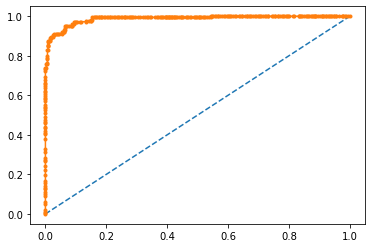

In [268]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.967


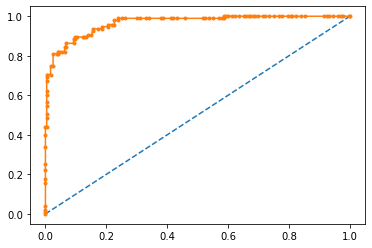

In [269]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

# Mobile Data



In [270]:
mobile = pd.read_csv('Mobile_Social_Media_Tourism_Data.csv')

In [271]:
mobile.head()

,Unnamed: 0,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,8.0,1,9,0,0,1
1,1,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0,9,1,1,0
2,2,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,7.0,1,5,0,0,1
3,3,247.0,48720.0,1.0,4.0,56.0,2909.0,1.0,11.0,3.0,8.0,0,9,0,0,1
4,4,202.0,20685.0,1.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0,7,1,0,0


In [272]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9477 entries, 0 to 9476
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    9477 non-null   int64  
 1   yearly_avg_view_on_travel_page                9477 non-null   float64
 2   total_likes_on_outstation_checkin_given       9477 non-null   float64
 3   yearly_avg_outstation_checkins                9477 non-null   float64
 4   member_in_family                              9477 non-null   float64
 5   yearly_avg_comment_on_travel_page             9477 non-null   float64
 6   total_likes_on_outofstation_checkin_received  9477 non-null   float64
 7   week_since_last_outstation_checkin            9477 non-null   float64
 8   montly_avg_comment_on_company_page            9477 non-null   float64
 9   travelling_network_rating                     9477 non-null   f

In [273]:
mobile.drop('Unnamed: 0', axis = 1, inplace = True)

In [274]:
mobile.head()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
0,307.0,38570.0,1.0,2.0,94.0,5993.0,8.0,11.0,1.0,8.0,1,9,0,0,1
1,367.0,9765.0,1.0,1.0,61.0,5130.0,1.0,23.0,4.0,10.0,0,9,1,1,0
2,277.0,48055.0,1.0,2.0,92.0,2090.0,6.0,15.0,2.0,7.0,1,5,0,0,1
3,247.0,48720.0,1.0,4.0,56.0,2909.0,1.0,11.0,3.0,8.0,0,9,0,0,1
4,202.0,20685.0,1.0,1.0,40.0,3468.0,9.0,12.0,4.0,6.0,0,7,1,0,0


In [275]:
mobile.tail()

,yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,yearly_avg_outstation_checkins,member_in_family,yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,daily_avg_mins_spend_on_traveling_page,taken_product,preferred_location_type,adult_flag_1.0,working_flag_Yes,following_company_page_Yes
9472,247.0,11418.0,5.0,3.0,99.0,9983.0,1.0,28.0,2.0,16.0,0,8,0,0,0
9473,210.0,40886.0,5.0,3.0,53.0,3024.0,2.0,32.0,4.0,14.0,0,5,0,0,0
9474,305.0,21510.0,6.0,1.0,55.0,10041.0,4.0,30.0,1.0,11.0,0,8,1,0,0
9475,214.0,5478.0,4.0,3.0,103.0,6203.0,3.0,40.0,2.0,12.0,0,10,1,1,1
9476,270.0,22025.0,8.0,3.0,104.0,4470.0,2.0,29.0,1.0,14.0,0,8,0,0,0


In [276]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9477 entries, 0 to 9476
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   yearly_avg_view_on_travel_page                9477 non-null   float64
 1   total_likes_on_outstation_checkin_given       9477 non-null   float64
 2   yearly_avg_outstation_checkins                9477 non-null   float64
 3   member_in_family                              9477 non-null   float64
 4   yearly_avg_comment_on_travel_page             9477 non-null   float64
 5   total_likes_on_outofstation_checkin_received  9477 non-null   float64
 6   week_since_last_outstation_checkin            9477 non-null   float64
 7   montly_avg_comment_on_company_page            9477 non-null   float64
 8   travelling_network_rating                     9477 non-null   float64
 9   daily_avg_mins_spend_on_traveling_page        9477 non-null   f

In [277]:
mobile.shape

(9477, 15)

In [278]:
mobile.describe().T

,count,mean,std,min,25%,50%,75%,max
yearly_avg_view_on_travel_page,9477.0,281.208821,67.396803,35.0,233.0,272.0,322.0,464.0
total_likes_on_outstation_checkin_given,9477.0,28223.218635,14311.650987,3570.0,16494.0,28083.0,40199.0,252430.0
yearly_avg_outstation_checkins,9477.0,8.203545,8.611388,1.0,1.0,4.0,14.0,29.0
member_in_family,9477.0,2.926031,1.047679,1.0,2.0,3.0,4.0,10.0
yearly_avg_comment_on_travel_page,9477.0,75.666245,24.179554,3.0,58.0,76.0,93.0,815.0
total_likes_on_outofstation_checkin_received,9477.0,6573.856389,4746.202248,1009.0,2952.0,4978.0,8419.0,20065.0
week_since_last_outstation_checkin,9477.0,3.290071,2.636994,0.0,1.0,3.0,5.0,11.0
montly_avg_comment_on_company_page,9477.0,30.600718,53.900142,11.0,18.0,23.0,28.0,500.0
travelling_network_rating,9477.0,2.706342,1.080339,1.0,2.0,3.0,4.0,4.0
daily_avg_mins_spend_on_traveling_page,9477.0,14.145405,9.273981,0.0,8.0,12.0,19.0,270.0


In [279]:
X = mobile.drop('taken_product', axis = 1)
y = mobile.pop('taken_product')

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

## Decision Tree

### Base Model

In [281]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state = 1)

In [282]:
dTree = dt_model.fit(X_train, y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

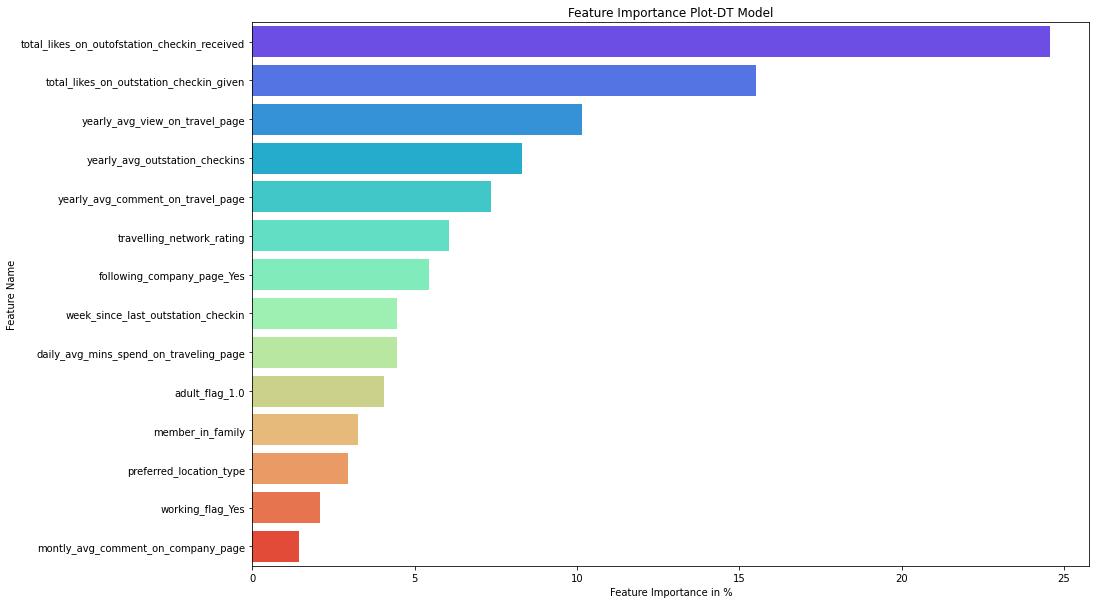

In [283]:
x = pd.DataFrame(dTree.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [284]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  24.557117
total_likes_on_outstation_checkin_given       15.504717
yearly_avg_view_on_travel_page                10.152403
yearly_avg_outstation_checkins                 8.302355
yearly_avg_comment_on_travel_page              7.338048
travelling_network_rating                      6.040364
following_company_page_Yes                     5.430836
week_since_last_outstation_checkin             4.468014
daily_avg_mins_spend_on_traveling_page         4.451477
adult_flag_1.0                                 4.054886
member_in_family                               3.249675
preferred_location_type                        2.942007
working_flag_Yes                               2.075933
montly_avg_comment_on_company_page             1.432166


In [285]:
ytrain_predict = dTree.predict(X_train)
ytest_predict = dTree.predict(X_test)

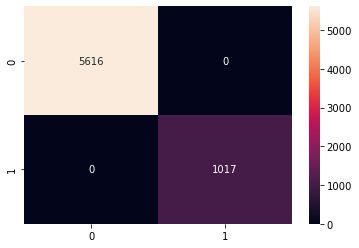

In [286]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [287]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5616
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      6633
   macro avg       1.00      1.00      1.00      6633
weighted avg       1.00      1.00      1.00      6633



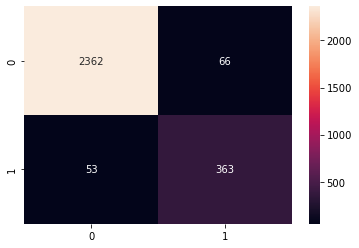

In [288]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [289]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2428
           1       0.85      0.87      0.86       416

    accuracy                           0.96      2844
   macro avg       0.91      0.92      0.92      2844
weighted avg       0.96      0.96      0.96      2844



AUC 1.000


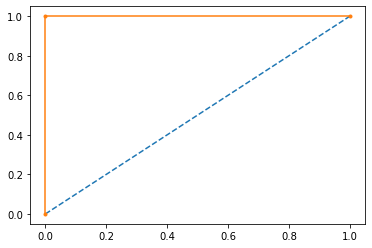

In [290]:
probs = dTree.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.923


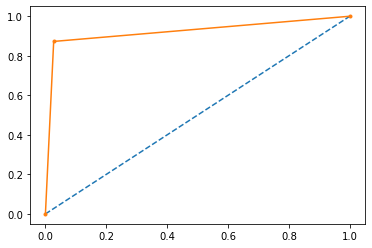

In [291]:
probs = dTree.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Decision Tree Model Tuning

In [292]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [293]:
dt_model = DecisionTreeClassifier(criterion = 'gini')
dTree = dt_model.fit(X_train, y_train)
dTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

In [294]:
train_char_labels = ['No', 'Yes']
Credit_Tree_File = open('D:\credit_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_labels))
Credit_Tree_File.close()

In [295]:
retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

system command returning error: 1


In [296]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, random_state=1)
dTreeR.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

In [297]:
train_char_label = ['No', 'Yes']
Credit_Tree_FileR = open('D:\credit_treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Credit_Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_FileR.close()

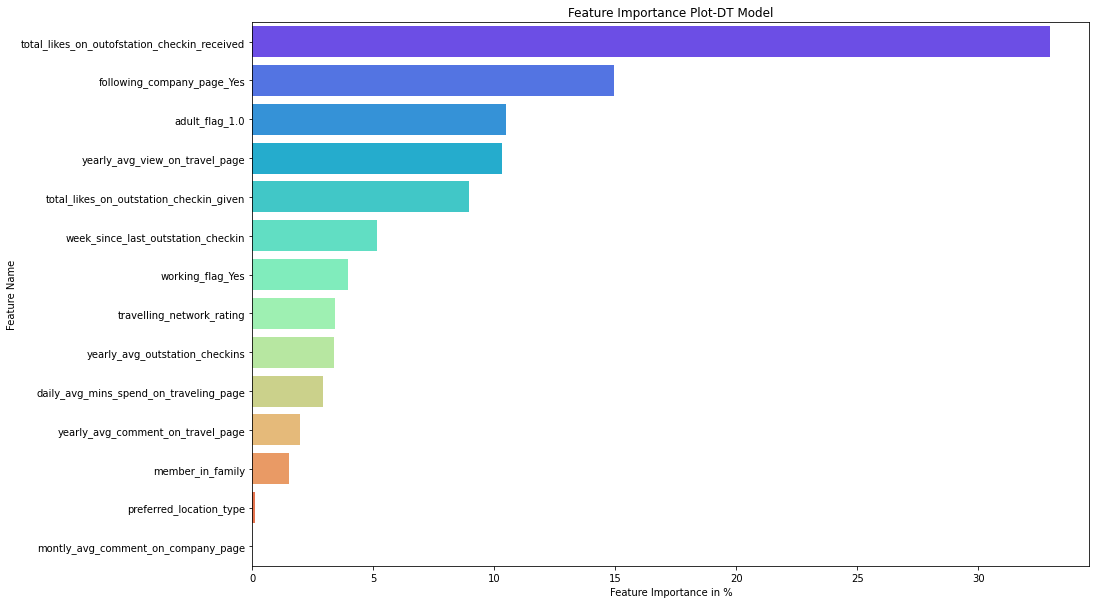

In [298]:
x = pd.DataFrame(dTreeR.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-DT Model')
plt.show()

In [299]:
print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  32.944840
following_company_page_Yes                    14.932071
adult_flag_1.0                                10.467701
yearly_avg_view_on_travel_page                10.317677
total_likes_on_outstation_checkin_given        8.949952
week_since_last_outstation_checkin             5.137990
working_flag_Yes                               3.965906
travelling_network_rating                      3.393716
yearly_avg_outstation_checkins                 3.363874
daily_avg_mins_spend_on_traveling_page         2.929439
yearly_avg_comment_on_travel_page              1.978239
member_in_family                               1.523560
preferred_location_type                        0.095033
montly_avg_comment_on_company_page             0.000000


In [300]:
param_grid = {
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf':[1, 2, 3, 4, 5],
    'max_depth':[4, 6, 8, 10],
}

In [301]:
grid_search = GridSearchCV(estimator=dTreeR, param_grid=param_grid, cv=3)

In [302]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=6,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              random_state=1, splitter='best'),
             n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs',

In [303]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [304]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, random_state=1,
                       splitter='best')

In [305]:
best_grid = grid_search.best_estimator_

In [306]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

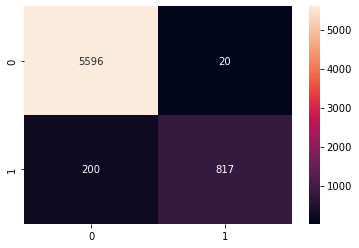

In [307]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [308]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5616
           1       0.98      0.80      0.88      1017

    accuracy                           0.97      6633
   macro avg       0.97      0.90      0.93      6633
weighted avg       0.97      0.97      0.97      6633



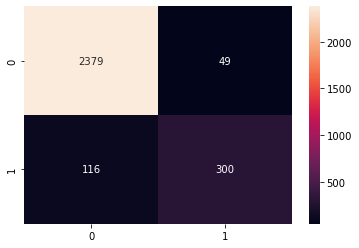

In [309]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [310]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2428
           1       0.86      0.72      0.78       416

    accuracy                           0.94      2844
   macro avg       0.91      0.85      0.88      2844
weighted avg       0.94      0.94      0.94      2844



AUC 0.978


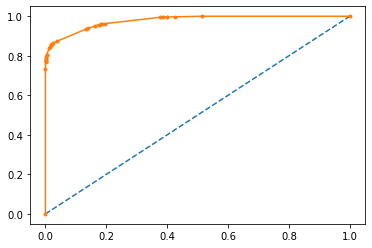

In [311]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.925


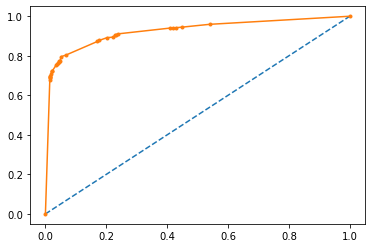

In [312]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Random Forest

### Base Model

In [313]:
rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

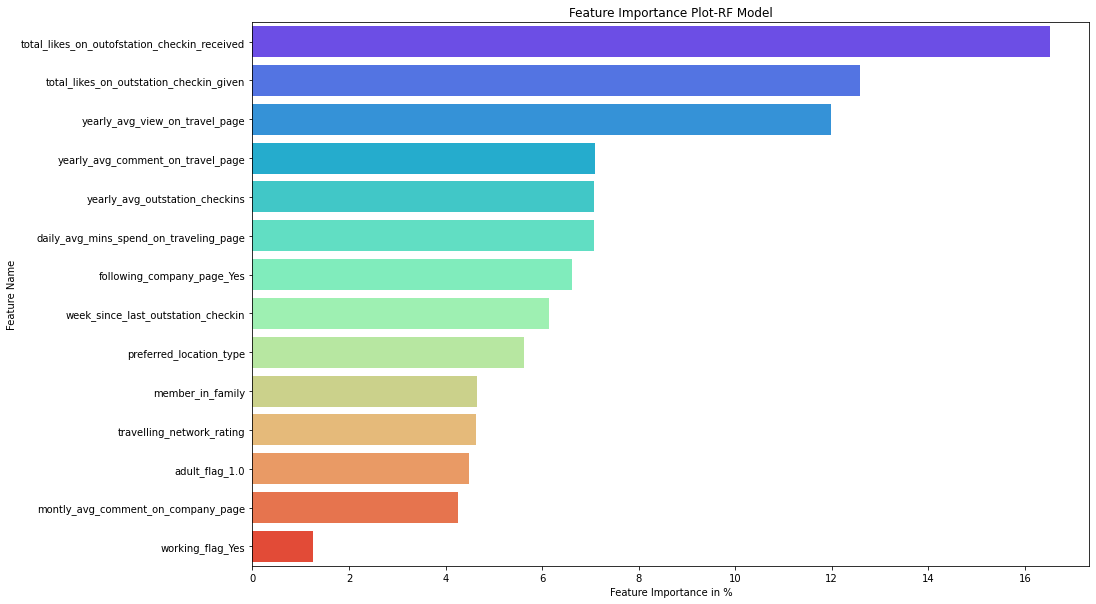

In [431]:
x = pd.DataFrame(rfcl.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-RF Model')
plt.show()

In [315]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  16.512620
total_likes_on_outstation_checkin_given       12.586668
yearly_avg_view_on_travel_page                11.981642
yearly_avg_comment_on_travel_page              7.104672
yearly_avg_outstation_checkins                 7.074679
daily_avg_mins_spend_on_traveling_page         7.074657
following_company_page_Yes                     6.625390
week_since_last_outstation_checkin             6.138334
preferred_location_type                        5.627717
member_in_family                               4.656019
travelling_network_rating                      4.636282
adult_flag_1.0                                 4.480127
montly_avg_comment_on_company_page             4.256324
working_flag_Yes                               1.244868


In [316]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

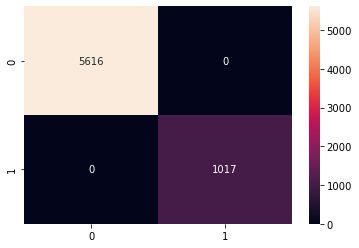

In [317]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [318]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5616
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      6633
   macro avg       1.00      1.00      1.00      6633
weighted avg       1.00      1.00      1.00      6633



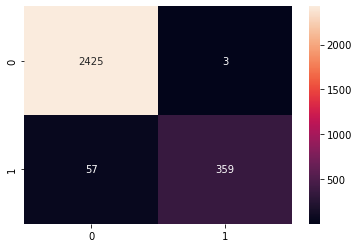

In [319]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [320]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2428
           1       0.99      0.86      0.92       416

    accuracy                           0.98      2844
   macro avg       0.98      0.93      0.96      2844
weighted avg       0.98      0.98      0.98      2844



AUC 1.000


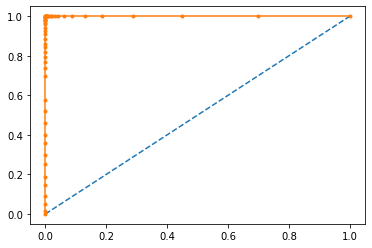

In [321]:
probs = rfcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.997


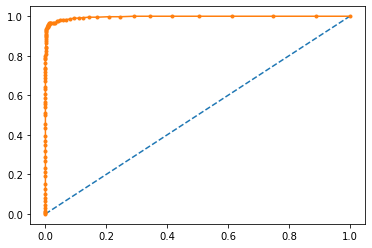

In [322]:
probs = rfcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Random Forest Model Tuning

In [323]:
rfcl = RandomForestClassifier(random_state = 1)
rfcl.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

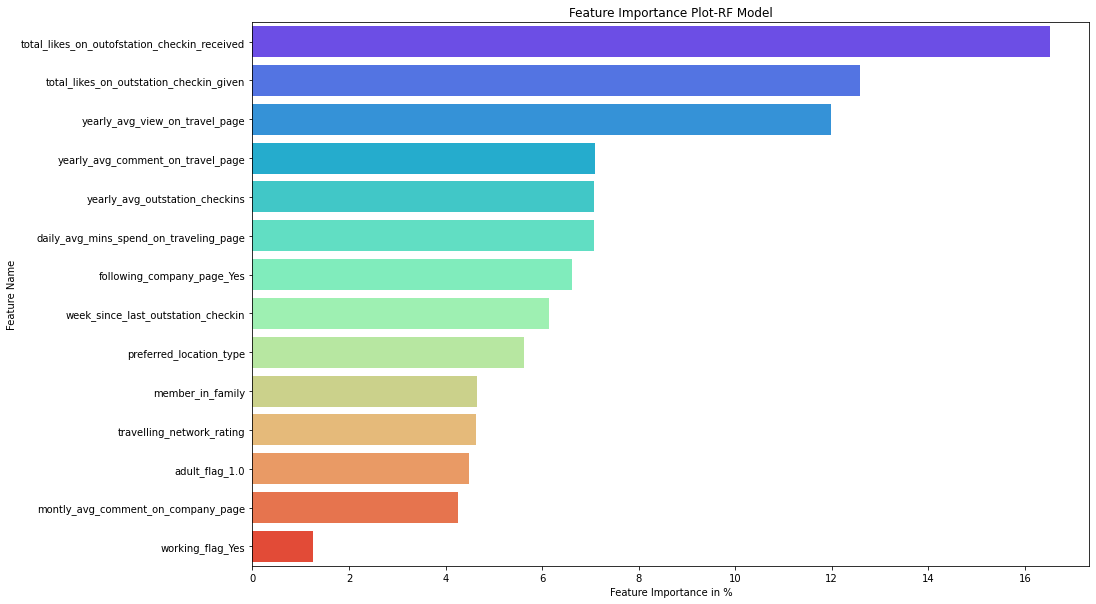

In [432]:
x = pd.DataFrame(rfcl.feature_importances_*100, index = X_train.columns).sort_values(by = 0, ascending = False)
plt.figure(figsize=(15,10))
sns.barplot(x[0], x.index, palette = 'rainbow')
plt.ylabel('Feature Name')
plt.xlabel('Feature Importance in %')
plt.title('Feature Importance Plot-RF Model')
plt.show()

In [325]:
print (pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False)*100)

                                                    Imp
total_likes_on_outofstation_checkin_received  16.512620
total_likes_on_outstation_checkin_given       12.586668
yearly_avg_view_on_travel_page                11.981642
yearly_avg_comment_on_travel_page              7.104672
yearly_avg_outstation_checkins                 7.074679
daily_avg_mins_spend_on_traveling_page         7.074657
following_company_page_Yes                     6.625390
week_since_last_outstation_checkin             6.138334
preferred_location_type                        5.627717
member_in_family                               4.656019
travelling_network_rating                      4.636282
adult_flag_1.0                                 4.480127
montly_avg_comment_on_company_page             4.256324
working_flag_Yes                               1.244868


In [326]:
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'max_features': [5, 10, 15],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'min_samples_split': [1, 2, 3, 4, 5],
    'n_estimators': [101,301,501]    
}

In [327]:
grid_search = GridSearchCV(estimator=rfcl, param_grid=param_grid, cv=3)

In [328]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                                   

In [329]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 101}

In [330]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features=10,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=101,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [331]:
best_grid = grid_search.best_estimator_

In [332]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

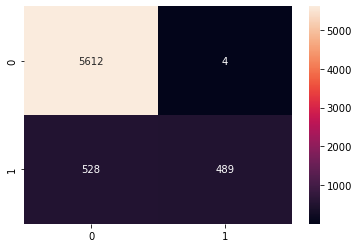

In [333]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [334]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      5616
           1       0.99      0.48      0.65      1017

    accuracy                           0.92      6633
   macro avg       0.95      0.74      0.80      6633
weighted avg       0.93      0.92      0.91      6633



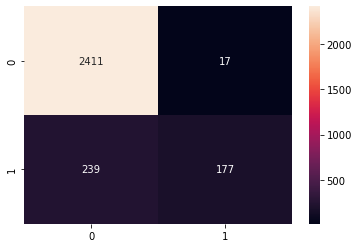

In [335]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [336]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2428
           1       0.91      0.43      0.58       416

    accuracy                           0.91      2844
   macro avg       0.91      0.71      0.76      2844
weighted avg       0.91      0.91      0.90      2844



AUC 0.963


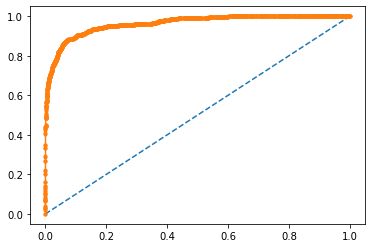

In [337]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.937


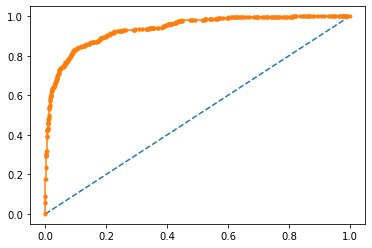

In [338]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Logistic Regression

### Base Model

In [339]:
mobile.median()

yearly_avg_view_on_travel_page                    272.0
total_likes_on_outstation_checkin_given         28083.0
yearly_avg_outstation_checkins                      4.0
member_in_family                                    3.0
yearly_avg_comment_on_travel_page                  76.0
total_likes_on_outofstation_checkin_received     4978.0
week_since_last_outstation_checkin                  3.0
montly_avg_comment_on_company_page                 23.0
travelling_network_rating                           3.0
daily_avg_mins_spend_on_traveling_page             12.0
preferred_location_type                             8.0
adult_flag_1.0                                      1.0
working_flag_Yes                                    0.0
following_company_page_Yes                          0.0
dtype: float64

In [340]:
mobile.std()

yearly_avg_view_on_travel_page                     67.396803
total_likes_on_outstation_checkin_given         14311.650987
yearly_avg_outstation_checkins                      8.611388
member_in_family                                    1.047679
yearly_avg_comment_on_travel_page                  24.179554
total_likes_on_outofstation_checkin_received     4746.202248
week_since_last_outstation_checkin                  2.636994
montly_avg_comment_on_company_page                 53.900142
travelling_network_rating                           1.080339
daily_avg_mins_spend_on_traveling_page              9.273981
preferred_location_type                             2.487034
adult_flag_1.0                                      0.494950
working_flag_Yes                                    0.359907
following_company_page_Yes                          0.447586
dtype: float64

In [341]:
sc = MinMaxScaler()

In [342]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [343]:
lr_model = LogisticRegression(random_state = 1)
lo_reg = lr_model.fit(X_train, y_train)
lo_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [344]:
ytrain_predict = lo_reg.predict(X_train)
ytest_predict = lo_reg.predict(X_test)

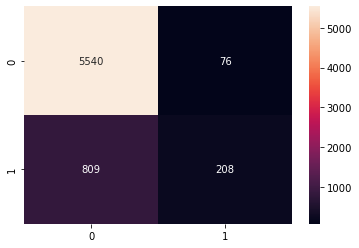

In [345]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [346]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5616
           1       0.73      0.20      0.32      1017

    accuracy                           0.87      6633
   macro avg       0.80      0.60      0.62      6633
weighted avg       0.85      0.87      0.83      6633



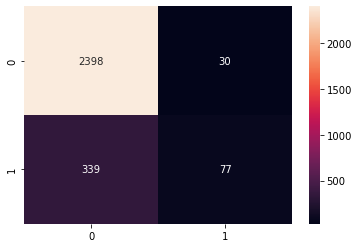

In [347]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [348]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2428
           1       0.72      0.19      0.29       416

    accuracy                           0.87      2844
   macro avg       0.80      0.59      0.61      2844
weighted avg       0.85      0.87      0.84      2844



AUC 0.786


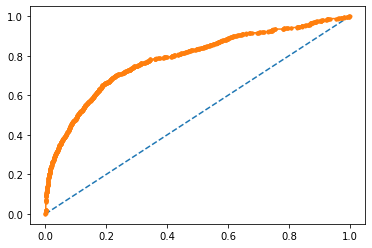

In [349]:
probs = lo_reg.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.792


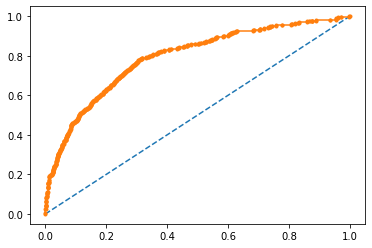

In [350]:
probs = lo_reg.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Logistic Regression Model Tuning

In [351]:
lr_model = LogisticRegression(random_state=1)

In [352]:
param_grid = {
    'penalty':['l2','none','l1'],
    'max_iter':[100,500,1000],
    'n_jobs':[-1,0,1],
    'solver':['lbfgs','newton-cg','sag']
    }

In [353]:
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid, cv=3)

In [354]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             n_jobs=None,
             param_grid={'max_iter': [100, 500, 1000], 'n_jobs': [-1, 0, 1],
                         'penalty': ['l2', 'none', 'l1'],
                         'solver': ['lbfgs', 'newton-cg', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [355]:
grid_search.best_params_

{'max_iter': 100, 'n_jobs': -1, 'penalty': 'none', 'solver': 'lbfgs'}

In [356]:
grid_search.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [357]:
best_grid = grid_search.best_estimator_

In [358]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

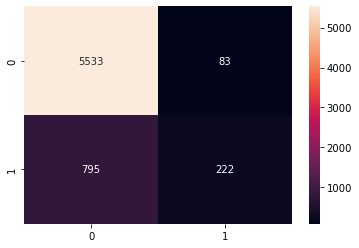

In [359]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [360]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      5616
           1       0.73      0.22      0.34      1017

    accuracy                           0.87      6633
   macro avg       0.80      0.60      0.63      6633
weighted avg       0.85      0.87      0.84      6633



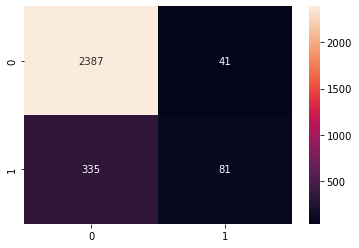

In [361]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [362]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2428
           1       0.66      0.19      0.30       416

    accuracy                           0.87      2844
   macro avg       0.77      0.59      0.61      2844
weighted avg       0.85      0.87      0.84      2844



AUC 0.787


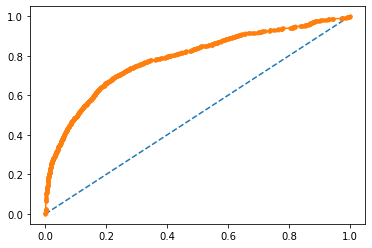

In [363]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.793


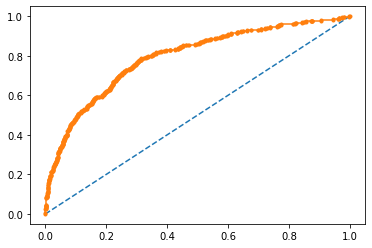

In [364]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Linear Discriminate Analysis

In [365]:
lda_model = LinearDiscriminantAnalysis()
lda = lda_model.fit(X_train, y_train)
lda

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

In [366]:
ytrain_predict = lda.predict(X_train)
ytest_predict = lda.predict(X_test)

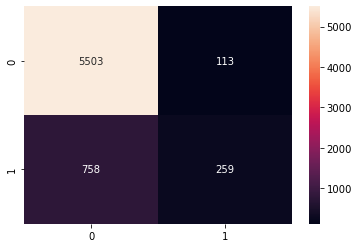

In [367]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [368]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      5616
           1       0.70      0.25      0.37      1017

    accuracy                           0.87      6633
   macro avg       0.79      0.62      0.65      6633
weighted avg       0.85      0.87      0.84      6633



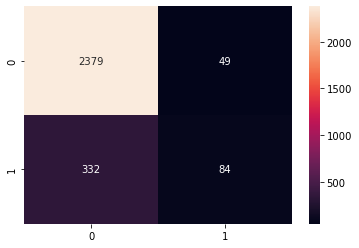

In [369]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [370]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      2428
           1       0.63      0.20      0.31       416

    accuracy                           0.87      2844
   macro avg       0.75      0.59      0.62      2844
weighted avg       0.84      0.87      0.84      2844



AUC 0.782


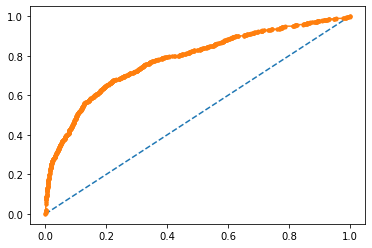

In [371]:
probs = lda.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.792


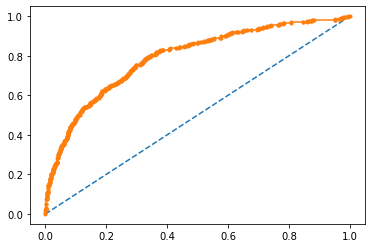

In [372]:
probs = lda.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## K Nearest Neighbour

### Base Model

In [373]:
NNH = KNeighborsClassifier( n_neighbors = 5, weights = 'distance')

In [374]:
knn = NNH.fit(X_train, y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [375]:
ytrain_predict = knn.predict(X_train)
ytest_predict = knn.predict(X_test)

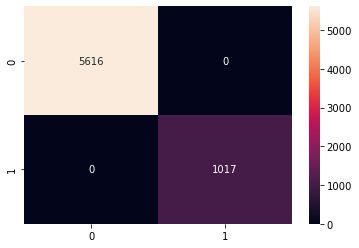

In [376]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [377]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5616
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      6633
   macro avg       1.00      1.00      1.00      6633
weighted avg       1.00      1.00      1.00      6633



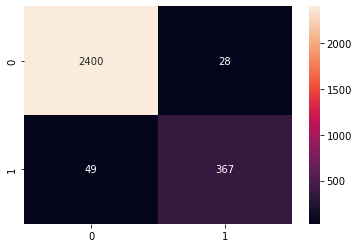

In [378]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [379]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2428
           1       0.93      0.88      0.91       416

    accuracy                           0.97      2844
   macro avg       0.95      0.94      0.94      2844
weighted avg       0.97      0.97      0.97      2844



AUC 1.000


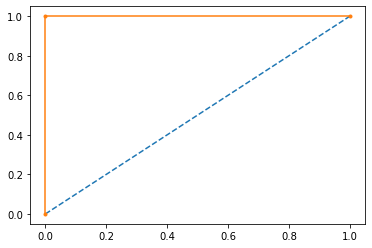

In [380]:
probs = knn.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.982


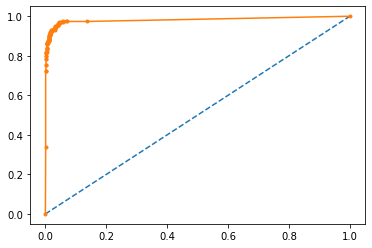

In [381]:
probs = knn.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### KNN Model Tuning

In [382]:
kncl = KNeighborsClassifier()

In [383]:
param_grid ={  'n_neighbors': range(1,20),
               'weights' : ['uniform','distance'],
               'metric': ['minkowski', 'euclidean', 'canberra']
              }

In [384]:
grid_search = GridSearchCV(estimator=kncl, param_grid=param_grid, cv=3)

In [385]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             n_jobs=None,
             param_grid={'metric': ['minkowski', 'euclidean', 'canberra'],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [386]:
grid_search.best_params_

{'metric': 'minkowski', 'n_neighbors': 1, 'weights': 'uniform'}

In [387]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [388]:
best_grid = grid_search.best_estimator_

In [389]:
ytrain_predict1 = best_grid.predict(X_train)
ytest_predict1 = best_grid.predict(X_test)

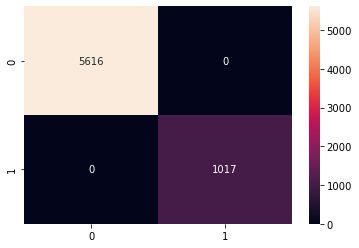

In [390]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict1),annot=True,fmt='.5g');

In [391]:
print(classification_report(y_train, ytrain_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5616
           1       1.00      1.00      1.00      1017

    accuracy                           1.00      6633
   macro avg       1.00      1.00      1.00      6633
weighted avg       1.00      1.00      1.00      6633



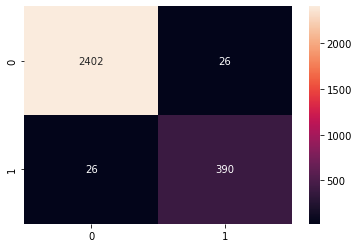

In [392]:
sns.heatmap(confusion_matrix(y_test, ytest_predict1),annot=True,fmt='.5g');

In [393]:
print(classification_report(y_test, ytest_predict1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2428
           1       0.94      0.94      0.94       416

    accuracy                           0.98      2844
   macro avg       0.96      0.96      0.96      2844
weighted avg       0.98      0.98      0.98      2844



AUC 1.000


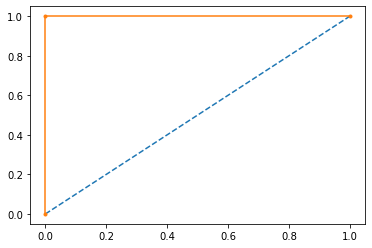

In [394]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.963


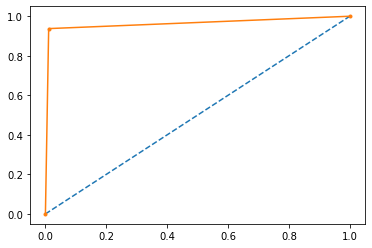

In [395]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Naive Bayes

In [396]:
NB_model = GaussianNB()
nb = NB_model.fit(X_train, y_train)
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [397]:
ytrain_predict = nb.predict(X_train)
ytest_predict = nb.predict(X_test)

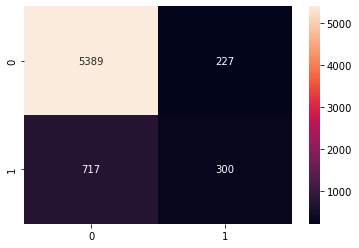

In [398]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [399]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5616
           1       0.57      0.29      0.39      1017

    accuracy                           0.86      6633
   macro avg       0.73      0.63      0.65      6633
weighted avg       0.83      0.86      0.84      6633



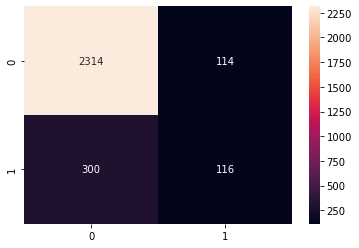

In [400]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [401]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2428
           1       0.50      0.28      0.36       416

    accuracy                           0.85      2844
   macro avg       0.69      0.62      0.64      2844
weighted avg       0.83      0.85      0.84      2844



AUC 0.764


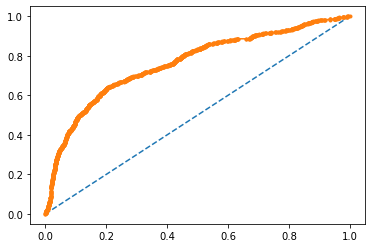

In [402]:
probs = nb.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.774


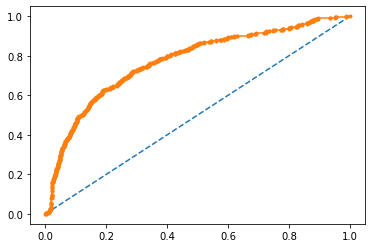

In [403]:
probs = nb.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

## Ensemble Modelling

### Bagging

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 1)

In [405]:
bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
bgcl = bgcl.fit(X_train, y_train)

In [406]:
ytrain_predict = bgcl.predict(X_train)
ytest_predict = bgcl.predict(X_test)

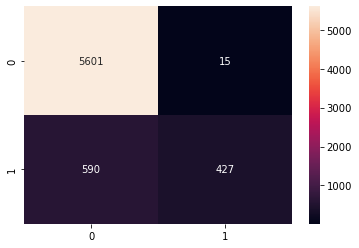

In [407]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [408]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      5616
           1       0.97      0.42      0.59      1017

    accuracy                           0.91      6633
   macro avg       0.94      0.71      0.77      6633
weighted avg       0.91      0.91      0.89      6633



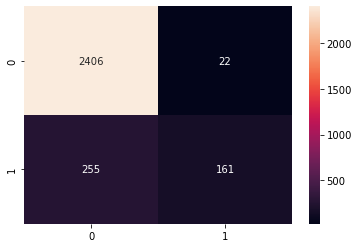

In [409]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [410]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95      2428
           1       0.88      0.39      0.54       416

    accuracy                           0.90      2844
   macro avg       0.89      0.69      0.74      2844
weighted avg       0.90      0.90      0.89      2844



AUC 0.915


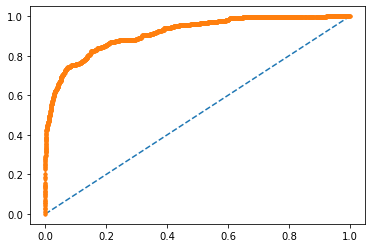

In [411]:
probs = bgcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.893


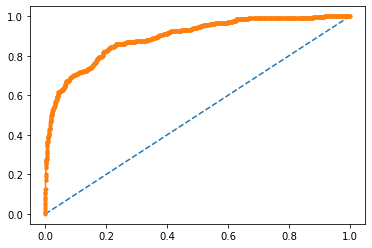

In [412]:
probs = bgcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Ada Boosting

In [413]:
abcl = AdaBoostClassifier(n_estimators=50, random_state=1)
abcl = abcl.fit(X_train, y_train)

In [414]:
ytrain_predict = abcl.predict(X_train)
ytest_predict = abcl.predict(X_test)

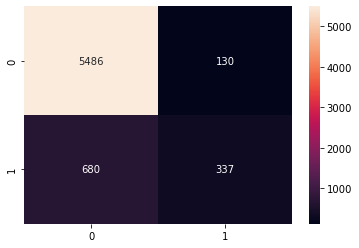

In [415]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [416]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      5616
           1       0.72      0.33      0.45      1017

    accuracy                           0.88      6633
   macro avg       0.81      0.65      0.69      6633
weighted avg       0.86      0.88      0.86      6633



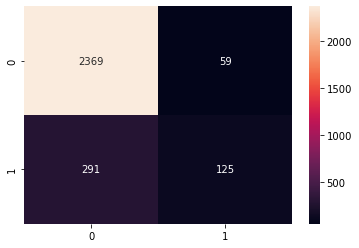

In [417]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [418]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2428
           1       0.68      0.30      0.42       416

    accuracy                           0.88      2844
   macro avg       0.78      0.64      0.67      2844
weighted avg       0.86      0.88      0.86      2844



AUC 0.860


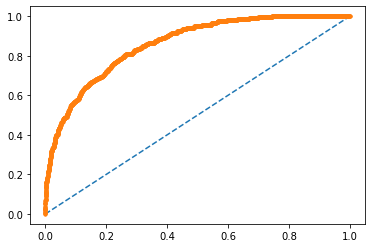

In [419]:
probs = abcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.845


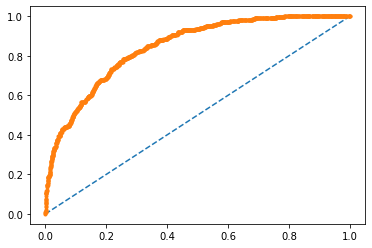

In [420]:
probs = abcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

### Gradient Boosting

In [421]:
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [422]:
ytrain_predict = gbcl.predict(X_train)
ytest_predict = gbcl.predict(X_test)

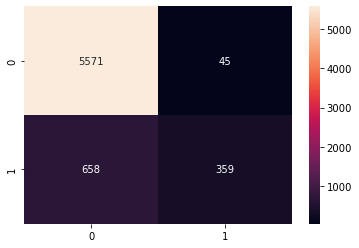

In [423]:
sns.heatmap(confusion_matrix(y_train, ytrain_predict),annot=True,fmt='.5g');

In [424]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5616
           1       0.89      0.35      0.51      1017

    accuracy                           0.89      6633
   macro avg       0.89      0.67      0.72      6633
weighted avg       0.89      0.89      0.87      6633



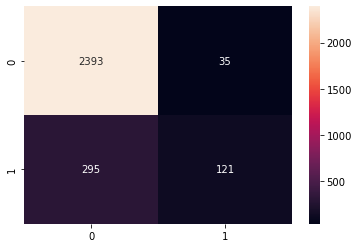

In [425]:
sns.heatmap(confusion_matrix(y_test, ytest_predict),annot=True,fmt='.5g');

In [426]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2428
           1       0.78      0.29      0.42       416

    accuracy                           0.88      2844
   macro avg       0.83      0.64      0.68      2844
weighted avg       0.87      0.88      0.86      2844



AUC 0.903


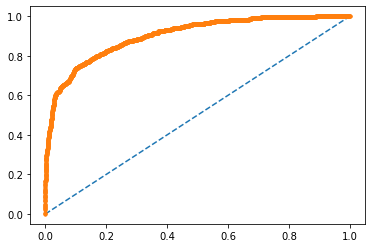

In [427]:
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC 0.895


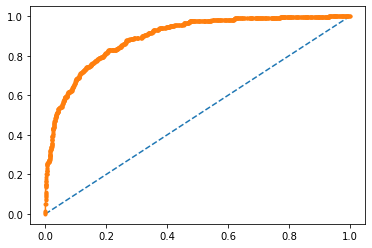

In [428]:
probs = gbcl.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC %.3f' %auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()